# Image Classification
In this project, you'll classify images from the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html).  The dataset consists of airplanes, dogs, cats, and other objects. You'll preprocess the images, then train a convolutional neural network on all the samples. The images need to be normalized and the labels need to be one-hot encoded.  You'll get to apply what you learned and build a convolutional, max pooling, dropout, and fully connected layers.  At the end, you'll get to see your neural network's predictions on the sample images.
## Get the Data
Run the following cell to download the [CIFAR-10 dataset for python](https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz).

In [1]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
from urllib.request import urlretrieve
from os.path import isfile, isdir
from tqdm import tqdm
import problem_unittests as tests
import tarfile

cifar10_dataset_folder_path = 'cifar-10-batches-py'

class DLProgress(tqdm):
    last_block = 0

    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num

if not isfile('cifar-10-python.tar.gz'):
    with DLProgress(unit='B', unit_scale=True, miniters=1, desc='CIFAR-10 Dataset') as pbar:
        urlretrieve(
            'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz',
            'cifar-10-python.tar.gz',
            pbar.hook)

if not isdir(cifar10_dataset_folder_path):
    with tarfile.open('cifar-10-python.tar.gz') as tar:
        tar.extractall()
        tar.close()


tests.test_folder_path(cifar10_dataset_folder_path)

CIFAR-10 Dataset: 171MB [00:20, 8.29MB/s]                                                                              


All files found!


## Explore the Data
The dataset is broken into batches to prevent your machine from running out of memory.  The CIFAR-10 dataset consists of 5 batches, named `data_batch_1`, `data_batch_2`, etc.. Each batch contains the labels and images that are one of the following:
* airplane
* automobile
* bird
* cat
* deer
* dog
* frog
* horse
* ship
* truck

Understanding a dataset is part of making predictions on the data.  Play around with the code cell below by changing the `batch_id` and `sample_id`. The `batch_id` is the id for a batch (1-5). The `sample_id` is the id for a image and label pair in the batch.

Ask yourself "What are all possible labels?", "What is the range of values for the image data?", "Are the labels in order or random?".  Answers to questions like these will help you preprocess the data and end up with better predictions.

Answer:
* Possible labels: 'batch_id', 'sample_id' and image names.
* Color range: 0-255.
* Random.


Stats of batch 5:
Samples: 10000
Label Counts: {0: 1014, 1: 1014, 2: 952, 3: 1016, 4: 997, 5: 1025, 6: 980, 7: 977, 8: 1003, 9: 1022}
First 20 Labels: [1, 8, 5, 1, 5, 7, 4, 3, 8, 2, 7, 2, 0, 1, 5, 9, 6, 2, 0, 8]

Example of Image 9999:
Image - Min Value: 4 Max Value: 255
Image - Shape: (32, 32, 3)
Label - Label Id: 1 Name: automobile


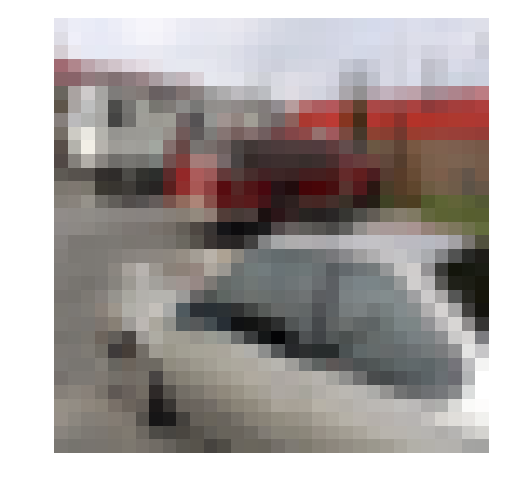

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper
import numpy as np

# Explore the dataset
batch_id = 5
sample_id = 9999
helper.display_stats(cifar10_dataset_folder_path, batch_id, sample_id)

## Implement Preprocess Functions
### Normalize
In the cell below, implement the `normalize` function to take in image data, `x`, and return it as a normalized Numpy array. The values should be in the range of 0 to 1, inclusive.  The return object should be the same shape as `x`.

In [5]:
def normalize(x):
    """
    Normalize a list of sample image data in the range of 0 to 1
    : x: List of image data.  The image shape is (32, 32, 3)
    : return: Numpy array of normalize data
    """
    # TODO: Implement Function
    return x / (np.max(x)-np.min(x))


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_normalize(normalize)

Tests Passed


### One-hot encode
Just like the previous code cell, you'll be implementing a function for preprocessing.  This time, you'll implement the `one_hot_encode` function. The input, `x`, are a list of labels.  Implement the function to return the list of labels as One-Hot encoded Numpy array.  The possible values for labels are 0 to 9. The one-hot encoding function should return the same encoding for each value between each call to `one_hot_encode`.  Make sure to save the map of encodings outside the function.

**Hint:**

Look into LabelBinarizer in the preprocessing module of sklearn.

In [7]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
lb.fit(range(10))

def one_hot_encode(x):
    """
    One hot encode a list of sample labels. Return a one-hot encoded vector for each label.
    : x: List of sample Labels
    : return: Numpy array of one-hot encoded labels
    """
    # TODO: Implement Function
    return lb.transform(x)

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_one_hot_encode(one_hot_encode)

Tests Passed


### Randomize Data
As you saw from exploring the data above, the order of the samples are randomized.  It doesn't hurt to randomize it again, but you don't need to for this dataset.

## Preprocess all the data and save it
Running the code cell below will preprocess all the CIFAR-10 data and save it to file. The code below also uses 10% of the training data for validation.

In [8]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
# Preprocess Training, Validation, and Testing Data
helper.preprocess_and_save_data(cifar10_dataset_folder_path, normalize, one_hot_encode)

# Check Point
This is your first checkpoint.  If you ever decide to come back to this notebook or have to restart the notebook, you can start from here.  The preprocessed data has been saved to disk.

In [9]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import pickle
import problem_unittests as tests
import helper

# Load the Preprocessed Validation data
valid_features, valid_labels = pickle.load(open('preprocess_validation.p', mode='rb'))

## Build the network
For the neural network, you'll build each layer into a function.  Most of the code you've seen has been outside of functions. To test your code more thoroughly, we require that you put each layer in a function.  This allows us to give you better feedback and test for simple mistakes using our unittests before you submit your project.

>**Note:** If you're finding it hard to dedicate enough time for this course each week, we've provided a small shortcut to this part of the project. In the next couple of problems, you'll have the option to use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages to build each layer, except the layers you build in the "Convolutional and Max Pooling Layer" section.  TF Layers is similar to Keras's and TFLearn's abstraction to layers, so it's easy to pickup.

>However, if you would like to get the most out of this course, try to solve all the problems _without_ using anything from the TF Layers packages. You **can** still use classes from other packages that happen to have the same name as ones you find in TF Layers! For example, instead of using the TF Layers version of the `conv2d` class, [tf.layers.conv2d](https://www.tensorflow.org/api_docs/python/tf/layers/conv2d), you would want to use the TF Neural Network version of `conv2d`, [tf.nn.conv2d](https://www.tensorflow.org/api_docs/python/tf/nn/conv2d). 

Let's begin!

### Input
The neural network needs to read the image data, one-hot encoded labels, and dropout keep probability. Implement the following functions
* Implement `neural_net_image_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `image_shape` with batch size set to `None`.
 * Name the TensorFlow placeholder "x" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_label_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `n_classes` with batch size set to `None`.
 * Name the TensorFlow placeholder "y" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_keep_prob_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder) for dropout keep probability.
 * Name the TensorFlow placeholder "keep_prob" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).

These names will be used at the end of the project to load your saved model.

Note: `None` for shapes in TensorFlow allow for a dynamic size.

In [10]:
import tensorflow as tf

batch_size = None

def neural_net_image_input(image_shape):
    """
    Return a Tensor for a batch of image input
    : image_shape: Shape of the images
    : return: Tensor for image input.
    """
    # TODO: Implement Function
    return tf.placeholder(tf.float32, shape=[batch_size, image_shape[0], image_shape[1], image_shape[2]], name='x')


def neural_net_label_input(n_classes):
    """
    Return a Tensor for a batch of label input
    : n_classes: Number of classes
    : return: Tensor for label input.
    """
    # TODO: Implement Function
    return tf.placeholder(tf.float32, shape=[batch_size, n_classes], name='y')


def neural_net_keep_prob_input():
    """
    Return a Tensor for keep probability
    : return: Tensor for keep probability.
    """
    # TODO: Implement Function
    return tf.placeholder(tf.float32, name='keep_prob')


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tf.reset_default_graph()
tests.test_nn_image_inputs(neural_net_image_input)
tests.test_nn_label_inputs(neural_net_label_input)
tests.test_nn_keep_prob_inputs(neural_net_keep_prob_input)

Image Input Tests Passed.
Label Input Tests Passed.
Keep Prob Tests Passed.


### Convolution and Max Pooling Layer
Convolution layers have a lot of success with images. For this code cell, you should implement the function `conv2d_maxpool` to apply convolution then max pooling:
* Create the weight and bias using `conv_ksize`, `conv_num_outputs` and the shape of `x_tensor`.
* Apply a convolution to `x_tensor` using weight and `conv_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.
* Add bias
* Add a nonlinear activation to the convolution.
* Apply Max Pooling using `pool_ksize` and `pool_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.

**Note:** You **can't** use [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) for **this** layer, but you can still use TensorFlow's [Neural Network](https://www.tensorflow.org/api_docs/python/tf/nn) package. You may still use the shortcut option for all the **other** layers.

** Hint: **

When unpacking values as an argument in Python, look into the [unpacking](https://docs.python.org/3/tutorial/controlflow.html#unpacking-argument-lists) operator. 

In [11]:
def conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides):
    """
    Apply convolution then max pooling to x_tensor
    :param x_tensor: TensorFlow Tensor
    :param conv_num_outputs: Number of outputs for the convolutional layer
    :param conv_ksize: kernal size 2-D Tuple for the convolutional layer
    :param conv_strides: Stride 2-D Tuple for convolution
    :param pool_ksize: kernal size 2-D Tuple for pool
    :param pool_strides: Stride 2-D Tuple for pool
    : return: A tensor that represents convolution and max pooling of x_tensor
    """
    # TODO: Implement Function
    padding = 'SAME'
      
    # color channels
    color_channels = int(x_tensor.shape[3])
    
    # calculate weight and bias
    weight = tf.Variable(tf.truncated_normal([*conv_ksize, color_channels, conv_num_outputs]))
    bias = tf.Variable(tf.zeros(conv_num_outputs))

    # converlutional layer
    x_in = x_tensor  
    c_strides = [1, *conv_strides, 1]
    
    conv_layer = tf.nn.conv2d(x_in, weight, c_strides, padding)
    conv_layer = tf.nn.bias_add(conv_layer, bias)
    conv_layer = tf.nn.sigmoid(conv_layer)

    # pooling layer
    p_ksize = [1, *pool_ksize, 1]
    p_strides = [1, *pool_strides, 1]
    pool = tf.nn.max_pool(conv_layer, p_ksize, p_strides, padding)
    return pool

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_con_pool(conv2d_maxpool)

Tests Passed


### Flatten Layer
Implement the `flatten` function to change the dimension of `x_tensor` from a 4-D tensor to a 2-D tensor.  The output should be the shape (*Batch Size*, *Flattened Image Size*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

In [13]:
def flatten(x_tensor):
    """
    Flatten x_tensor to (Batch Size, Flattened Image Size)
    : x_tensor: A tensor of size (Batch Size, ...), where ... are the image dimensions.
    : return: A tensor of size (Batch Size, Flattened Image Size).
    """
    # TODO: Implement Function
    return tf.contrib.layers.flatten(x_tensor)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_flatten(flatten)

Tests Passed


### Fully-Connected Layer
Implement the `fully_conn` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

In [14]:
def fully_conn(x_tensor, num_outputs):
    """
    Apply a fully connected layer to x_tensor using weight and bias 
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # TODO: Implement Function
    return tf.contrib.layers.fully_connected(x_tensor, num_outputs)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_fully_conn(fully_conn)

Tests Passed


### Output Layer
Implement the `output` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

**Note:** Activation, softmax, or cross entropy should **not** be applied to this.

In [15]:
def output(x_tensor, num_outputs):
    """
    Apply a output layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # TODO: Implement Function
    return tf.contrib.layers.linear(x_tensor, num_outputs)
#     return tf.contrib.layers.fully_connected(x_tensor, num_outputs, activation_fn=tf.sigmoid)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_output(output)

Tests Passed


### Create Convolutional Model
Implement the function `conv_net` to create a convolutional neural network model. The function takes in a batch of images, `x`, and outputs logits.  Use the layers you created above to create this model:

* Apply 1, 2, or 3 Convolution and Max Pool layers
* Apply a Flatten Layer
* Apply 1, 2, or 3 Fully Connected Layers
* Apply an Output Layer
* Return the output
* Apply [TensorFlow's Dropout](https://www.tensorflow.org/api_docs/python/tf/nn/dropout) to one or more layers in the model using `keep_prob`. 

In [16]:
def conv_net(x, keep_prob):
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data.
    : keep_prob: Placeholder tensor that hold dropout keep probability.
    : return: Tensor that represents logits
    """
    # TODO: Apply 1, 2, or 3 Convolution and Max Pool layers
    #    Play around with different number of outputs, kernel size and stride
    # Function Definition from Above:
    #    conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
    
    x_tensor = x
    
    pool_ksize = (2,2)
    pool_strides = (1,1)
    
    # Conv_layer 1
    conv_ksize = (4,4)
    conv_strides = (2,2)
    conv_num_outputs = 12    
    conv_layer = conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
    
    # Conv_layer 2
    conv_ksize = (3,3)
    conv_strides = (1,1)
    conv_num_outputs = 48    
    conv_layer = conv2d_maxpool(conv_layer, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
    
    # Conv_layer 3
    conv_ksize = (2,2)
    conv_strides = (2,2)
    conv_num_outputs = 192    
    conv_layer = conv2d_maxpool(conv_layer, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
        

    # TODO: Apply a Flatten Layer
    # Function Definition from Above:
    #   flatten(x_tensor)
    flat_layer = flatten(conv_layer)

    # TODO: Apply 1, 2, or 3 Fully Connected Layers
    #    Play around with different number of outputs
    # Function Definition from Above:
    #   fully_conn(x_tensor, num_outputs)
    
    # fully_conn_layer 1
    num_outputs = 1024
    fully_conn_layer = tf.nn.dropout(flat_layer, keep_prob)
    fully_conn_layer =  fully_conn(fully_conn_layer, num_outputs)
    
    # fully_conn_layer 2
    num_outputs = 512    
    fully_conn_layer = tf.nn.dropout(flat_layer, keep_prob)
    fully_conn_layer =  fully_conn(fully_conn_layer, num_outputs)
    
    # fully_conn_layer 3
    num_outputs = 128
    fully_conn_layer = tf.nn.dropout(fully_conn_layer, keep_prob)
    fully_conn_layer =  fully_conn(fully_conn_layer, num_outputs)
    
    # TODO: Apply an Output Layer
    #    Set this to the number of classes
    # Function Definition from Above:
    #   output(x_tensor, num_outputs)
    out_layer = output(fully_conn_layer, 10)
    
    # TODO: return output
    return out_layer


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

##############################
## Build the Neural Network ##
##############################

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
x = neural_net_image_input((32, 32, 3))
y = neural_net_label_input(10)
keep_prob = neural_net_keep_prob_input()

# Model
logits = conv_net(x, keep_prob)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer().minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

tests.test_conv_net(conv_net)

Neural Network Built!


## Train the Neural Network
### Single Optimization
Implement the function `train_neural_network` to do a single optimization.  The optimization should use `optimizer` to optimize in `session` with a `feed_dict` of the following:
* `x` for image input
* `y` for labels
* `keep_prob` for keep probability for dropout

This function will be called for each batch, so `tf.global_variables_initializer()` has already been called.

Note: Nothing needs to be returned. This function is only optimizing the neural network.

In [17]:
def train_neural_network(session, optimizer, keep_probability, feature_batch, label_batch):
    """
    Optimize the session on a batch of images and labels
    : session: Current TensorFlow session
    : optimizer: TensorFlow optimizer function
    : keep_probability: keep probability
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    """
    # TODO: Implement Function
    session.run(optimizer, feed_dict={x: feature_batch,
                                      y: label_batch,
                                      keep_prob: keep_probability})
    

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_train_nn(train_neural_network)

Tests Passed


### Show Stats
Implement the function `print_stats` to print loss and validation accuracy.  Use the global variables `valid_features` and `valid_labels` to calculate validation accuracy.  Use a keep probability of `1.0` to calculate the loss and validation accuracy.

In [18]:
def print_stats(session, feature_batch, label_batch, cost, accuracy):
    """
    Print information about loss and validation accuracy
    : session: Current TensorFlow session
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    : cost: TensorFlow cost function
    : accuracy: TensorFlow accuracy function
    """
    # TODO: Implement Function
    
    # loss
    loss = session.run(cost, feed_dict={x:feature_batch, y:label_batch, keep_prob:1.0})
    
    # accuracy
    valid_accuracy = session.run(accuracy, feed_dict={x:valid_features, y:valid_labels, keep_prob:1.0})
    print('Accuracy is:', valid_accuracy, 'Loss is:', loss)
    
    pass

### Hyperparameters
Tune the following parameters:
* Set `epochs` to the number of iterations until the network stops learning or start overfitting
* Set `batch_size` to the highest number that your machine has memory for.  Most people set them to common sizes of memory:
 * 64
 * 128
 * 256
 * ...
* Set `keep_probability` to the probability of keeping a node using dropout

In [19]:
# TODO: Tune Parameters
epochs = 1000
batch_size = 256
keep_probability = 0.75

### Train on a Single CIFAR-10 Batch
Instead of training the neural network on all the CIFAR-10 batches of data, let's use a single batch. This should save time while you iterate on the model to get a better accuracy.  Once the final validation accuracy is 50% or greater, run the model on all the data in the next section.

In [20]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)

Checking the Training on a Single Batch...
Epoch  1, CIFAR-10 Batch 1:  Accuracy is: 0.144 Loss is: 2.28694
Epoch  2, CIFAR-10 Batch 1:  Accuracy is: 0.1816 Loss is: 2.22551
Epoch  3, CIFAR-10 Batch 1:  Accuracy is: 0.2576 Loss is: 2.07369
Epoch  4, CIFAR-10 Batch 1:  Accuracy is: 0.332 Loss is: 1.96125
Epoch  5, CIFAR-10 Batch 1:  Accuracy is: 0.3604 Loss is: 1.83628
Epoch  6, CIFAR-10 Batch 1:  Accuracy is: 0.3786 Loss is: 1.77213
Epoch  7, CIFAR-10 Batch 1:  Accuracy is: 0.3904 Loss is: 1.68871
Epoch  8, CIFAR-10 Batch 1:  Accuracy is: 0.4182 Loss is: 1.56917
Epoch  9, CIFAR-10 Batch 1:  Accuracy is: 0.4328 Loss is: 1.49982
Epoch 10, CIFAR-10 Batch 1:  Accuracy is: 0.4404 Loss is: 1.47664
Epoch 11, CIFAR-10 Batch 1:  Accuracy is: 0.4412 Loss is: 1.46661
Epoch 12, CIFAR-10 Batch 1:  Accuracy is: 0.4666 Loss is: 1.33589
Epoch 13, CIFAR-10 Batch 1:  Accuracy is: 0.4642 Loss is: 1.29088
Epoch 14, CIFAR-10 Batch 1:  Accuracy is: 0.4832 Loss is: 1.18246
Epoch 15, CIFAR-10 Batch 1:  Accura

Epoch 122, CIFAR-10 Batch 1:  Accuracy is: 0.5574 Loss is: 0.0191852
Epoch 123, CIFAR-10 Batch 1:  Accuracy is: 0.5622 Loss is: 0.0193201
Epoch 124, CIFAR-10 Batch 1:  Accuracy is: 0.5564 Loss is: 0.0223623
Epoch 125, CIFAR-10 Batch 1:  Accuracy is: 0.5552 Loss is: 0.0221837
Epoch 126, CIFAR-10 Batch 1:  Accuracy is: 0.5618 Loss is: 0.0160932
Epoch 127, CIFAR-10 Batch 1:  Accuracy is: 0.5594 Loss is: 0.0210851
Epoch 128, CIFAR-10 Batch 1:  Accuracy is: 0.5578 Loss is: 0.0160484
Epoch 129, CIFAR-10 Batch 1:  Accuracy is: 0.5488 Loss is: 0.0199548
Epoch 130, CIFAR-10 Batch 1:  Accuracy is: 0.5428 Loss is: 0.0103712
Epoch 131, CIFAR-10 Batch 1:  Accuracy is: 0.5444 Loss is: 0.00989546
Epoch 132, CIFAR-10 Batch 1:  Accuracy is: 0.5494 Loss is: 0.0126542
Epoch 133, CIFAR-10 Batch 1:  Accuracy is: 0.5288 Loss is: 0.012643
Epoch 134, CIFAR-10 Batch 1:  Accuracy is: 0.5468 Loss is: 0.0110557
Epoch 135, CIFAR-10 Batch 1:  Accuracy is: 0.5482 Loss is: 0.0130057
Epoch 136, CIFAR-10 Batch 1:  Accu

Epoch 240, CIFAR-10 Batch 1:  Accuracy is: 0.548 Loss is: 0.00216004
Epoch 241, CIFAR-10 Batch 1:  Accuracy is: 0.5452 Loss is: 0.0035858
Epoch 242, CIFAR-10 Batch 1:  Accuracy is: 0.5524 Loss is: 0.00204755
Epoch 243, CIFAR-10 Batch 1:  Accuracy is: 0.538 Loss is: 0.00209061
Epoch 244, CIFAR-10 Batch 1:  Accuracy is: 0.5514 Loss is: 0.00208971
Epoch 245, CIFAR-10 Batch 1:  Accuracy is: 0.5482 Loss is: 0.00218297
Epoch 246, CIFAR-10 Batch 1:  Accuracy is: 0.5506 Loss is: 0.00280554
Epoch 247, CIFAR-10 Batch 1:  Accuracy is: 0.5394 Loss is: 0.00359392
Epoch 248, CIFAR-10 Batch 1:  Accuracy is: 0.5476 Loss is: 0.00226156
Epoch 249, CIFAR-10 Batch 1:  Accuracy is: 0.5496 Loss is: 0.00426748
Epoch 250, CIFAR-10 Batch 1:  Accuracy is: 0.5418 Loss is: 0.00366171
Epoch 251, CIFAR-10 Batch 1:  Accuracy is: 0.543 Loss is: 0.00263302
Epoch 252, CIFAR-10 Batch 1:  Accuracy is: 0.5474 Loss is: 0.00333113
Epoch 253, CIFAR-10 Batch 1:  Accuracy is: 0.5476 Loss is: 0.00416869
Epoch 254, CIFAR-10 Batc

Epoch 357, CIFAR-10 Batch 1:  Accuracy is: 0.5506 Loss is: 0.000254481
Epoch 358, CIFAR-10 Batch 1:  Accuracy is: 0.547 Loss is: 0.000265145
Epoch 359, CIFAR-10 Batch 1:  Accuracy is: 0.5446 Loss is: 0.000739288
Epoch 360, CIFAR-10 Batch 1:  Accuracy is: 0.5438 Loss is: 0.000303208
Epoch 361, CIFAR-10 Batch 1:  Accuracy is: 0.5472 Loss is: 0.00123023
Epoch 362, CIFAR-10 Batch 1:  Accuracy is: 0.5422 Loss is: 0.000502042
Epoch 363, CIFAR-10 Batch 1:  Accuracy is: 0.5456 Loss is: 0.0004942
Epoch 364, CIFAR-10 Batch 1:  Accuracy is: 0.5482 Loss is: 0.000336832
Epoch 365, CIFAR-10 Batch 1:  Accuracy is: 0.5502 Loss is: 0.000411333
Epoch 366, CIFAR-10 Batch 1:  Accuracy is: 0.5464 Loss is: 0.000493907
Epoch 367, CIFAR-10 Batch 1:  Accuracy is: 0.5518 Loss is: 0.000379947
Epoch 368, CIFAR-10 Batch 1:  Accuracy is: 0.5478 Loss is: 0.000706794
Epoch 369, CIFAR-10 Batch 1:  Accuracy is: 0.5504 Loss is: 0.000519753
Epoch 370, CIFAR-10 Batch 1:  Accuracy is: 0.5494 Loss is: 0.00046137
Epoch 371, 

Epoch 473, CIFAR-10 Batch 1:  Accuracy is: 0.5462 Loss is: 0.000486411
Epoch 474, CIFAR-10 Batch 1:  Accuracy is: 0.5454 Loss is: 0.000731196
Epoch 475, CIFAR-10 Batch 1:  Accuracy is: 0.552 Loss is: 0.000211247
Epoch 476, CIFAR-10 Batch 1:  Accuracy is: 0.5348 Loss is: 0.00108367
Epoch 477, CIFAR-10 Batch 1:  Accuracy is: 0.5518 Loss is: 0.000432607
Epoch 478, CIFAR-10 Batch 1:  Accuracy is: 0.56 Loss is: 0.000249138
Epoch 479, CIFAR-10 Batch 1:  Accuracy is: 0.5552 Loss is: 0.00030053
Epoch 480, CIFAR-10 Batch 1:  Accuracy is: 0.5544 Loss is: 0.0001511
Epoch 481, CIFAR-10 Batch 1:  Accuracy is: 0.5476 Loss is: 0.000275959
Epoch 482, CIFAR-10 Batch 1:  Accuracy is: 0.5366 Loss is: 0.000276895
Epoch 483, CIFAR-10 Batch 1:  Accuracy is: 0.547 Loss is: 0.000351765
Epoch 484, CIFAR-10 Batch 1:  Accuracy is: 0.5396 Loss is: 0.000745313
Epoch 485, CIFAR-10 Batch 1:  Accuracy is: 0.5478 Loss is: 0.000510628
Epoch 486, CIFAR-10 Batch 1:  Accuracy is: 0.5518 Loss is: 0.000355278
Epoch 487, CIF

Epoch 588, CIFAR-10 Batch 1:  Accuracy is: 0.5502 Loss is: 3.63675e-05
Epoch 589, CIFAR-10 Batch 1:  Accuracy is: 0.5398 Loss is: 4.88255e-05
Epoch 590, CIFAR-10 Batch 1:  Accuracy is: 0.5486 Loss is: 0.00026006
Epoch 591, CIFAR-10 Batch 1:  Accuracy is: 0.5512 Loss is: 0.000297742
Epoch 592, CIFAR-10 Batch 1:  Accuracy is: 0.5404 Loss is: 0.000279612
Epoch 593, CIFAR-10 Batch 1:  Accuracy is: 0.5458 Loss is: 7.26507e-05
Epoch 594, CIFAR-10 Batch 1:  Accuracy is: 0.5488 Loss is: 0.00017064
Epoch 595, CIFAR-10 Batch 1:  Accuracy is: 0.543 Loss is: 0.000119292
Epoch 596, CIFAR-10 Batch 1:  Accuracy is: 0.5378 Loss is: 0.000319761
Epoch 597, CIFAR-10 Batch 1:  Accuracy is: 0.5482 Loss is: 8.89942e-05
Epoch 598, CIFAR-10 Batch 1:  Accuracy is: 0.5414 Loss is: 0.000135401
Epoch 599, CIFAR-10 Batch 1:  Accuracy is: 0.5444 Loss is: 0.000158399
Epoch 600, CIFAR-10 Batch 1:  Accuracy is: 0.543 Loss is: 0.000141608
Epoch 601, CIFAR-10 Batch 1:  Accuracy is: 0.5462 Loss is: 0.000152068
Epoch 602,

Epoch 704, CIFAR-10 Batch 1:  Accuracy is: 0.5534 Loss is: 4.22127e-05
Epoch 705, CIFAR-10 Batch 1:  Accuracy is: 0.5476 Loss is: 5.01316e-05
Epoch 706, CIFAR-10 Batch 1:  Accuracy is: 0.5486 Loss is: 8.69207e-05
Epoch 707, CIFAR-10 Batch 1:  Accuracy is: 0.5522 Loss is: 1.42801e-05
Epoch 708, CIFAR-10 Batch 1:  Accuracy is: 0.5438 Loss is: 6.54797e-05
Epoch 709, CIFAR-10 Batch 1:  Accuracy is: 0.5414 Loss is: 2.8742e-05
Epoch 710, CIFAR-10 Batch 1:  Accuracy is: 0.5462 Loss is: 6.16524e-05
Epoch 711, CIFAR-10 Batch 1:  Accuracy is: 0.5446 Loss is: 4.7772e-05
Epoch 712, CIFAR-10 Batch 1:  Accuracy is: 0.5458 Loss is: 3.47097e-05
Epoch 713, CIFAR-10 Batch 1:  Accuracy is: 0.5578 Loss is: 3.26742e-05
Epoch 714, CIFAR-10 Batch 1:  Accuracy is: 0.5566 Loss is: 2.52377e-05
Epoch 715, CIFAR-10 Batch 1:  Accuracy is: 0.552 Loss is: 3.08957e-05
Epoch 716, CIFAR-10 Batch 1:  Accuracy is: 0.5474 Loss is: 4.0277e-05
Epoch 717, CIFAR-10 Batch 1:  Accuracy is: 0.5454 Loss is: 1.39917e-05
Epoch 718,

Epoch 819, CIFAR-10 Batch 1:  Accuracy is: 0.5434 Loss is: 3.20743e-05
Epoch 820, CIFAR-10 Batch 1:  Accuracy is: 0.5412 Loss is: 5.22031e-05
Epoch 821, CIFAR-10 Batch 1:  Accuracy is: 0.5426 Loss is: 5.01006e-05
Epoch 822, CIFAR-10 Batch 1:  Accuracy is: 0.5508 Loss is: 4.02155e-05
Epoch 823, CIFAR-10 Batch 1:  Accuracy is: 0.5536 Loss is: 5.76221e-05
Epoch 824, CIFAR-10 Batch 1:  Accuracy is: 0.5404 Loss is: 2.7764e-05
Epoch 825, CIFAR-10 Batch 1:  Accuracy is: 0.5514 Loss is: 7.90301e-05
Epoch 826, CIFAR-10 Batch 1:  Accuracy is: 0.5514 Loss is: 5.11627e-05
Epoch 827, CIFAR-10 Batch 1:  Accuracy is: 0.5506 Loss is: 4.77955e-05
Epoch 828, CIFAR-10 Batch 1:  Accuracy is: 0.5492 Loss is: 0.000153327
Epoch 829, CIFAR-10 Batch 1:  Accuracy is: 0.5442 Loss is: 0.000131213
Epoch 830, CIFAR-10 Batch 1:  Accuracy is: 0.5456 Loss is: 6.96983e-05
Epoch 831, CIFAR-10 Batch 1:  Accuracy is: 0.543 Loss is: 5.03052e-05
Epoch 832, CIFAR-10 Batch 1:  Accuracy is: 0.5472 Loss is: 0.000160484
Epoch 83

Epoch 934, CIFAR-10 Batch 1:  Accuracy is: 0.541 Loss is: 5.21177e-05
Epoch 935, CIFAR-10 Batch 1:  Accuracy is: 0.5438 Loss is: 2.08719e-05
Epoch 936, CIFAR-10 Batch 1:  Accuracy is: 0.554 Loss is: 3.85561e-05
Epoch 937, CIFAR-10 Batch 1:  Accuracy is: 0.549 Loss is: 1.79461e-05
Epoch 938, CIFAR-10 Batch 1:  Accuracy is: 0.5464 Loss is: 0.000139527
Epoch 939, CIFAR-10 Batch 1:  Accuracy is: 0.5366 Loss is: 5.48887e-05
Epoch 940, CIFAR-10 Batch 1:  Accuracy is: 0.5478 Loss is: 3.08942e-05
Epoch 941, CIFAR-10 Batch 1:  Accuracy is: 0.549 Loss is: 1.8909e-05
Epoch 942, CIFAR-10 Batch 1:  Accuracy is: 0.549 Loss is: 1.94019e-05
Epoch 943, CIFAR-10 Batch 1:  Accuracy is: 0.5498 Loss is: 2.12498e-05
Epoch 944, CIFAR-10 Batch 1:  Accuracy is: 0.5546 Loss is: 0.000136093
Epoch 945, CIFAR-10 Batch 1:  Accuracy is: 0.5364 Loss is: 2.36842e-05
Epoch 946, CIFAR-10 Batch 1:  Accuracy is: 0.5418 Loss is: 6.25888e-05
Epoch 947, CIFAR-10 Batch 1:  Accuracy is: 0.5392 Loss is: 7.20797e-05
Epoch 948, C

### Fully Train the Model
Now that you got a good accuracy with a single CIFAR-10 batch, try it with all five batches.

In [21]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
save_model_path = './image_classification'

print('Training...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        # Loop over all batches
        n_batches = 5
        for batch_i in range(1, n_batches + 1):
            for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
                train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
            print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
            print_stats(sess, batch_features, batch_labels, cost, accuracy)
            
    # Save Model
    saver = tf.train.Saver()
    save_path = saver.save(sess, save_model_path)

Training...
Epoch  1, CIFAR-10 Batch 1:  Accuracy is: 0.0998 Loss is: 2.30281
Epoch  1, CIFAR-10 Batch 2:  Accuracy is: 0.0998 Loss is: 2.30315
Epoch  1, CIFAR-10 Batch 3:  Accuracy is: 0.0998 Loss is: 2.30222
Epoch  1, CIFAR-10 Batch 4:  Accuracy is: 0.1294 Loss is: 2.26333
Epoch  1, CIFAR-10 Batch 5:  Accuracy is: 0.1874 Loss is: 2.21993
Epoch  2, CIFAR-10 Batch 1:  Accuracy is: 0.2944 Loss is: 2.05634
Epoch  2, CIFAR-10 Batch 2:  Accuracy is: 0.3422 Loss is: 1.8926
Epoch  2, CIFAR-10 Batch 3:  Accuracy is: 0.3908 Loss is: 1.58949
Epoch  2, CIFAR-10 Batch 4:  Accuracy is: 0.4196 Loss is: 1.6126
Epoch  2, CIFAR-10 Batch 5:  Accuracy is: 0.4432 Loss is: 1.57326
Epoch  3, CIFAR-10 Batch 1:  Accuracy is: 0.455 Loss is: 1.63357
Epoch  3, CIFAR-10 Batch 2:  Accuracy is: 0.4694 Loss is: 1.48686
Epoch  3, CIFAR-10 Batch 3:  Accuracy is: 0.4492 Loss is: 1.11187
Epoch  3, CIFAR-10 Batch 4:  Accuracy is: 0.4834 Loss is: 1.34377
Epoch  3, CIFAR-10 Batch 5:  Accuracy is: 0.501 Loss is: 1.3451
Epo

Epoch 25, CIFAR-10 Batch 4:  Accuracy is: 0.6282 Loss is: 0.15959
Epoch 25, CIFAR-10 Batch 5:  Accuracy is: 0.6424 Loss is: 0.111345
Epoch 26, CIFAR-10 Batch 1:  Accuracy is: 0.6404 Loss is: 0.17879
Epoch 26, CIFAR-10 Batch 2:  Accuracy is: 0.628 Loss is: 0.141693
Epoch 26, CIFAR-10 Batch 3:  Accuracy is: 0.6278 Loss is: 0.132541
Epoch 26, CIFAR-10 Batch 4:  Accuracy is: 0.6338 Loss is: 0.15254
Epoch 26, CIFAR-10 Batch 5:  Accuracy is: 0.6468 Loss is: 0.12144
Epoch 27, CIFAR-10 Batch 1:  Accuracy is: 0.6408 Loss is: 0.172163
Epoch 27, CIFAR-10 Batch 2:  Accuracy is: 0.629 Loss is: 0.111731
Epoch 27, CIFAR-10 Batch 3:  Accuracy is: 0.6304 Loss is: 0.107051
Epoch 27, CIFAR-10 Batch 4:  Accuracy is: 0.6326 Loss is: 0.110054
Epoch 27, CIFAR-10 Batch 5:  Accuracy is: 0.6378 Loss is: 0.106848
Epoch 28, CIFAR-10 Batch 1:  Accuracy is: 0.63 Loss is: 0.148124
Epoch 28, CIFAR-10 Batch 2:  Accuracy is: 0.6254 Loss is: 0.117172
Epoch 28, CIFAR-10 Batch 3:  Accuracy is: 0.63 Loss is: 0.123886
Epoch

Epoch 49, CIFAR-10 Batch 5:  Accuracy is: 0.6376 Loss is: 0.0391059
Epoch 50, CIFAR-10 Batch 1:  Accuracy is: 0.6278 Loss is: 0.062152
Epoch 50, CIFAR-10 Batch 2:  Accuracy is: 0.6374 Loss is: 0.0438126
Epoch 50, CIFAR-10 Batch 3:  Accuracy is: 0.6398 Loss is: 0.0310228
Epoch 50, CIFAR-10 Batch 4:  Accuracy is: 0.6522 Loss is: 0.0452505
Epoch 50, CIFAR-10 Batch 5:  Accuracy is: 0.6488 Loss is: 0.0334272
Epoch 51, CIFAR-10 Batch 1:  Accuracy is: 0.643 Loss is: 0.0597075
Epoch 51, CIFAR-10 Batch 2:  Accuracy is: 0.621 Loss is: 0.0450551
Epoch 51, CIFAR-10 Batch 3:  Accuracy is: 0.6356 Loss is: 0.0408723
Epoch 51, CIFAR-10 Batch 4:  Accuracy is: 0.6418 Loss is: 0.0314592
Epoch 51, CIFAR-10 Batch 5:  Accuracy is: 0.6344 Loss is: 0.0279471
Epoch 52, CIFAR-10 Batch 1:  Accuracy is: 0.6416 Loss is: 0.0719939
Epoch 52, CIFAR-10 Batch 2:  Accuracy is: 0.6322 Loss is: 0.0325689
Epoch 52, CIFAR-10 Batch 3:  Accuracy is: 0.6408 Loss is: 0.0454432
Epoch 52, CIFAR-10 Batch 4:  Accuracy is: 0.6446 Lo

Epoch 73, CIFAR-10 Batch 5:  Accuracy is: 0.639 Loss is: 0.0242039
Epoch 74, CIFAR-10 Batch 1:  Accuracy is: 0.63 Loss is: 0.0386696
Epoch 74, CIFAR-10 Batch 2:  Accuracy is: 0.6424 Loss is: 0.0250904
Epoch 74, CIFAR-10 Batch 3:  Accuracy is: 0.6438 Loss is: 0.0200906
Epoch 74, CIFAR-10 Batch 4:  Accuracy is: 0.6354 Loss is: 0.026027
Epoch 74, CIFAR-10 Batch 5:  Accuracy is: 0.6378 Loss is: 0.019533
Epoch 75, CIFAR-10 Batch 1:  Accuracy is: 0.6306 Loss is: 0.0378401
Epoch 75, CIFAR-10 Batch 2:  Accuracy is: 0.6364 Loss is: 0.0278947
Epoch 75, CIFAR-10 Batch 3:  Accuracy is: 0.6428 Loss is: 0.0172903
Epoch 75, CIFAR-10 Batch 4:  Accuracy is: 0.6346 Loss is: 0.0288764
Epoch 75, CIFAR-10 Batch 5:  Accuracy is: 0.6368 Loss is: 0.0282454
Epoch 76, CIFAR-10 Batch 1:  Accuracy is: 0.634 Loss is: 0.0440125
Epoch 76, CIFAR-10 Batch 2:  Accuracy is: 0.6354 Loss is: 0.0259491
Epoch 76, CIFAR-10 Batch 3:  Accuracy is: 0.6352 Loss is: 0.0225006
Epoch 76, CIFAR-10 Batch 4:  Accuracy is: 0.6412 Loss 

Epoch 98, CIFAR-10 Batch 1:  Accuracy is: 0.6428 Loss is: 0.0225502
Epoch 98, CIFAR-10 Batch 2:  Accuracy is: 0.6344 Loss is: 0.0124159
Epoch 98, CIFAR-10 Batch 3:  Accuracy is: 0.6318 Loss is: 0.0219382
Epoch 98, CIFAR-10 Batch 4:  Accuracy is: 0.6416 Loss is: 0.0137387
Epoch 98, CIFAR-10 Batch 5:  Accuracy is: 0.6374 Loss is: 0.0144224
Epoch 99, CIFAR-10 Batch 1:  Accuracy is: 0.6374 Loss is: 0.0285669
Epoch 99, CIFAR-10 Batch 2:  Accuracy is: 0.639 Loss is: 0.015643
Epoch 99, CIFAR-10 Batch 3:  Accuracy is: 0.6364 Loss is: 0.014486
Epoch 99, CIFAR-10 Batch 4:  Accuracy is: 0.637 Loss is: 0.0140779
Epoch 99, CIFAR-10 Batch 5:  Accuracy is: 0.6396 Loss is: 0.0123899
Epoch 100, CIFAR-10 Batch 1:  Accuracy is: 0.6392 Loss is: 0.0177485
Epoch 100, CIFAR-10 Batch 2:  Accuracy is: 0.6404 Loss is: 0.0131015
Epoch 100, CIFAR-10 Batch 3:  Accuracy is: 0.632 Loss is: 0.0121626
Epoch 100, CIFAR-10 Batch 4:  Accuracy is: 0.639 Loss is: 0.0129657
Epoch 100, CIFAR-10 Batch 5:  Accuracy is: 0.6464 

Epoch 121, CIFAR-10 Batch 5:  Accuracy is: 0.6364 Loss is: 0.00661705
Epoch 122, CIFAR-10 Batch 1:  Accuracy is: 0.6456 Loss is: 0.0144988
Epoch 122, CIFAR-10 Batch 2:  Accuracy is: 0.6374 Loss is: 0.0125352
Epoch 122, CIFAR-10 Batch 3:  Accuracy is: 0.6368 Loss is: 0.00913313
Epoch 122, CIFAR-10 Batch 4:  Accuracy is: 0.6322 Loss is: 0.0145152
Epoch 122, CIFAR-10 Batch 5:  Accuracy is: 0.632 Loss is: 0.0074961
Epoch 123, CIFAR-10 Batch 1:  Accuracy is: 0.649 Loss is: 0.0164735
Epoch 123, CIFAR-10 Batch 2:  Accuracy is: 0.6396 Loss is: 0.0138122
Epoch 123, CIFAR-10 Batch 3:  Accuracy is: 0.638 Loss is: 0.00863495
Epoch 123, CIFAR-10 Batch 4:  Accuracy is: 0.642 Loss is: 0.0124175
Epoch 123, CIFAR-10 Batch 5:  Accuracy is: 0.6328 Loss is: 0.00836638
Epoch 124, CIFAR-10 Batch 1:  Accuracy is: 0.641 Loss is: 0.0125762
Epoch 124, CIFAR-10 Batch 2:  Accuracy is: 0.6374 Loss is: 0.0146791
Epoch 124, CIFAR-10 Batch 3:  Accuracy is: 0.6424 Loss is: 0.00942711
Epoch 124, CIFAR-10 Batch 4:  Accu

Epoch 145, CIFAR-10 Batch 3:  Accuracy is: 0.6398 Loss is: 0.00781733
Epoch 145, CIFAR-10 Batch 4:  Accuracy is: 0.6426 Loss is: 0.00737739
Epoch 145, CIFAR-10 Batch 5:  Accuracy is: 0.6318 Loss is: 0.00753389
Epoch 146, CIFAR-10 Batch 1:  Accuracy is: 0.6364 Loss is: 0.015294
Epoch 146, CIFAR-10 Batch 2:  Accuracy is: 0.635 Loss is: 0.010974
Epoch 146, CIFAR-10 Batch 3:  Accuracy is: 0.6394 Loss is: 0.0071081
Epoch 146, CIFAR-10 Batch 4:  Accuracy is: 0.6338 Loss is: 0.0144691
Epoch 146, CIFAR-10 Batch 5:  Accuracy is: 0.6398 Loss is: 0.00701584
Epoch 147, CIFAR-10 Batch 1:  Accuracy is: 0.64 Loss is: 0.0154295
Epoch 147, CIFAR-10 Batch 2:  Accuracy is: 0.647 Loss is: 0.0143029
Epoch 147, CIFAR-10 Batch 3:  Accuracy is: 0.6458 Loss is: 0.00499506
Epoch 147, CIFAR-10 Batch 4:  Accuracy is: 0.6364 Loss is: 0.012418
Epoch 147, CIFAR-10 Batch 5:  Accuracy is: 0.6424 Loss is: 0.00963408
Epoch 148, CIFAR-10 Batch 1:  Accuracy is: 0.6372 Loss is: 0.0186356
Epoch 148, CIFAR-10 Batch 2:  Accur

Epoch 169, CIFAR-10 Batch 1:  Accuracy is: 0.6416 Loss is: 0.0121462
Epoch 169, CIFAR-10 Batch 2:  Accuracy is: 0.6428 Loss is: 0.00453913
Epoch 169, CIFAR-10 Batch 3:  Accuracy is: 0.6448 Loss is: 0.00248894
Epoch 169, CIFAR-10 Batch 4:  Accuracy is: 0.647 Loss is: 0.00454989
Epoch 169, CIFAR-10 Batch 5:  Accuracy is: 0.6406 Loss is: 0.00808936
Epoch 170, CIFAR-10 Batch 1:  Accuracy is: 0.6368 Loss is: 0.0171234
Epoch 170, CIFAR-10 Batch 2:  Accuracy is: 0.6338 Loss is: 0.0035905
Epoch 170, CIFAR-10 Batch 3:  Accuracy is: 0.6386 Loss is: 0.00371511
Epoch 170, CIFAR-10 Batch 4:  Accuracy is: 0.647 Loss is: 0.004241
Epoch 170, CIFAR-10 Batch 5:  Accuracy is: 0.6482 Loss is: 0.00439252
Epoch 171, CIFAR-10 Batch 1:  Accuracy is: 0.633 Loss is: 0.0149763
Epoch 171, CIFAR-10 Batch 2:  Accuracy is: 0.6428 Loss is: 0.00395666
Epoch 171, CIFAR-10 Batch 3:  Accuracy is: 0.6404 Loss is: 0.00303877
Epoch 171, CIFAR-10 Batch 4:  Accuracy is: 0.65 Loss is: 0.00358469
Epoch 171, CIFAR-10 Batch 5:  A

Epoch 192, CIFAR-10 Batch 3:  Accuracy is: 0.6388 Loss is: 0.00169605
Epoch 192, CIFAR-10 Batch 4:  Accuracy is: 0.6322 Loss is: 0.00374826
Epoch 192, CIFAR-10 Batch 5:  Accuracy is: 0.6428 Loss is: 0.00545503
Epoch 193, CIFAR-10 Batch 1:  Accuracy is: 0.6324 Loss is: 0.01713
Epoch 193, CIFAR-10 Batch 2:  Accuracy is: 0.6356 Loss is: 0.00880099
Epoch 193, CIFAR-10 Batch 3:  Accuracy is: 0.6344 Loss is: 0.00219528
Epoch 193, CIFAR-10 Batch 4:  Accuracy is: 0.6396 Loss is: 0.0036711
Epoch 193, CIFAR-10 Batch 5:  Accuracy is: 0.6408 Loss is: 0.00189982
Epoch 194, CIFAR-10 Batch 1:  Accuracy is: 0.6398 Loss is: 0.0194456
Epoch 194, CIFAR-10 Batch 2:  Accuracy is: 0.6398 Loss is: 0.00414284
Epoch 194, CIFAR-10 Batch 3:  Accuracy is: 0.6356 Loss is: 0.00418024
Epoch 194, CIFAR-10 Batch 4:  Accuracy is: 0.6384 Loss is: 0.00450263
Epoch 194, CIFAR-10 Batch 5:  Accuracy is: 0.6386 Loss is: 0.00309844
Epoch 195, CIFAR-10 Batch 1:  Accuracy is: 0.6422 Loss is: 0.00795126
Epoch 195, CIFAR-10 Batch

Epoch 215, CIFAR-10 Batch 5:  Accuracy is: 0.6452 Loss is: 0.00337639
Epoch 216, CIFAR-10 Batch 1:  Accuracy is: 0.6372 Loss is: 0.00576877
Epoch 216, CIFAR-10 Batch 2:  Accuracy is: 0.6358 Loss is: 0.00451269
Epoch 216, CIFAR-10 Batch 3:  Accuracy is: 0.6306 Loss is: 0.00206016
Epoch 216, CIFAR-10 Batch 4:  Accuracy is: 0.6364 Loss is: 0.00314677
Epoch 216, CIFAR-10 Batch 5:  Accuracy is: 0.6462 Loss is: 0.00351701
Epoch 217, CIFAR-10 Batch 1:  Accuracy is: 0.6372 Loss is: 0.0109129
Epoch 217, CIFAR-10 Batch 2:  Accuracy is: 0.6394 Loss is: 0.00314828
Epoch 217, CIFAR-10 Batch 3:  Accuracy is: 0.629 Loss is: 0.00101055
Epoch 217, CIFAR-10 Batch 4:  Accuracy is: 0.639 Loss is: 0.00516
Epoch 217, CIFAR-10 Batch 5:  Accuracy is: 0.631 Loss is: 0.00273081
Epoch 218, CIFAR-10 Batch 1:  Accuracy is: 0.6448 Loss is: 0.0111528
Epoch 218, CIFAR-10 Batch 2:  Accuracy is: 0.64 Loss is: 0.00417659
Epoch 218, CIFAR-10 Batch 3:  Accuracy is: 0.6312 Loss is: 0.00139604
Epoch 218, CIFAR-10 Batch 4:  

Epoch 239, CIFAR-10 Batch 2:  Accuracy is: 0.6468 Loss is: 0.000805478
Epoch 239, CIFAR-10 Batch 3:  Accuracy is: 0.6438 Loss is: 0.000501925
Epoch 239, CIFAR-10 Batch 4:  Accuracy is: 0.6464 Loss is: 0.00259298
Epoch 239, CIFAR-10 Batch 5:  Accuracy is: 0.6458 Loss is: 0.00170573
Epoch 240, CIFAR-10 Batch 1:  Accuracy is: 0.643 Loss is: 0.0123629
Epoch 240, CIFAR-10 Batch 2:  Accuracy is: 0.6368 Loss is: 0.00265104
Epoch 240, CIFAR-10 Batch 3:  Accuracy is: 0.641 Loss is: 0.00213794
Epoch 240, CIFAR-10 Batch 4:  Accuracy is: 0.6504 Loss is: 0.00483132
Epoch 240, CIFAR-10 Batch 5:  Accuracy is: 0.6344 Loss is: 0.00355751
Epoch 241, CIFAR-10 Batch 1:  Accuracy is: 0.6428 Loss is: 0.0137998
Epoch 241, CIFAR-10 Batch 2:  Accuracy is: 0.6418 Loss is: 0.00953051
Epoch 241, CIFAR-10 Batch 3:  Accuracy is: 0.6334 Loss is: 0.00157252
Epoch 241, CIFAR-10 Batch 4:  Accuracy is: 0.647 Loss is: 0.00532638
Epoch 241, CIFAR-10 Batch 5:  Accuracy is: 0.6452 Loss is: 0.00320888
Epoch 242, CIFAR-10 Bat

Epoch 262, CIFAR-10 Batch 4:  Accuracy is: 0.6396 Loss is: 0.00220589
Epoch 262, CIFAR-10 Batch 5:  Accuracy is: 0.6476 Loss is: 0.00369834
Epoch 263, CIFAR-10 Batch 1:  Accuracy is: 0.6406 Loss is: 0.00703877
Epoch 263, CIFAR-10 Batch 2:  Accuracy is: 0.6472 Loss is: 0.0015762
Epoch 263, CIFAR-10 Batch 3:  Accuracy is: 0.6442 Loss is: 0.00220545
Epoch 263, CIFAR-10 Batch 4:  Accuracy is: 0.6476 Loss is: 0.00239308
Epoch 263, CIFAR-10 Batch 5:  Accuracy is: 0.6454 Loss is: 0.00212507
Epoch 264, CIFAR-10 Batch 1:  Accuracy is: 0.6398 Loss is: 0.0068337
Epoch 264, CIFAR-10 Batch 2:  Accuracy is: 0.6398 Loss is: 0.00431174
Epoch 264, CIFAR-10 Batch 3:  Accuracy is: 0.6446 Loss is: 0.00186691
Epoch 264, CIFAR-10 Batch 4:  Accuracy is: 0.6504 Loss is: 0.00236812
Epoch 264, CIFAR-10 Batch 5:  Accuracy is: 0.6442 Loss is: 0.00255071
Epoch 265, CIFAR-10 Batch 1:  Accuracy is: 0.6444 Loss is: 0.00413683
Epoch 265, CIFAR-10 Batch 2:  Accuracy is: 0.6382 Loss is: 0.00135547
Epoch 265, CIFAR-10 Ba

Epoch 286, CIFAR-10 Batch 1:  Accuracy is: 0.6456 Loss is: 0.0042143
Epoch 286, CIFAR-10 Batch 2:  Accuracy is: 0.6402 Loss is: 0.00521252
Epoch 286, CIFAR-10 Batch 3:  Accuracy is: 0.645 Loss is: 0.00128951
Epoch 286, CIFAR-10 Batch 4:  Accuracy is: 0.6436 Loss is: 0.00122819
Epoch 286, CIFAR-10 Batch 5:  Accuracy is: 0.6514 Loss is: 0.00123062
Epoch 287, CIFAR-10 Batch 1:  Accuracy is: 0.6454 Loss is: 0.00676571
Epoch 287, CIFAR-10 Batch 2:  Accuracy is: 0.6446 Loss is: 0.00155813
Epoch 287, CIFAR-10 Batch 3:  Accuracy is: 0.6482 Loss is: 0.000954131
Epoch 287, CIFAR-10 Batch 4:  Accuracy is: 0.6524 Loss is: 0.000953425
Epoch 287, CIFAR-10 Batch 5:  Accuracy is: 0.6424 Loss is: 0.000997561
Epoch 288, CIFAR-10 Batch 1:  Accuracy is: 0.6422 Loss is: 0.00545012
Epoch 288, CIFAR-10 Batch 2:  Accuracy is: 0.6498 Loss is: 0.00397578
Epoch 288, CIFAR-10 Batch 3:  Accuracy is: 0.6484 Loss is: 0.00122471
Epoch 288, CIFAR-10 Batch 4:  Accuracy is: 0.6514 Loss is: 0.00171643
Epoch 288, CIFAR-10

Epoch 309, CIFAR-10 Batch 3:  Accuracy is: 0.644 Loss is: 0.000683745
Epoch 309, CIFAR-10 Batch 4:  Accuracy is: 0.6496 Loss is: 0.0010224
Epoch 309, CIFAR-10 Batch 5:  Accuracy is: 0.6484 Loss is: 0.00316082
Epoch 310, CIFAR-10 Batch 1:  Accuracy is: 0.6376 Loss is: 0.00629461
Epoch 310, CIFAR-10 Batch 2:  Accuracy is: 0.6522 Loss is: 0.000962128
Epoch 310, CIFAR-10 Batch 3:  Accuracy is: 0.6416 Loss is: 0.00157084
Epoch 310, CIFAR-10 Batch 4:  Accuracy is: 0.6488 Loss is: 0.00113696
Epoch 310, CIFAR-10 Batch 5:  Accuracy is: 0.6482 Loss is: 0.00394922
Epoch 311, CIFAR-10 Batch 1:  Accuracy is: 0.636 Loss is: 0.00710348
Epoch 311, CIFAR-10 Batch 2:  Accuracy is: 0.6512 Loss is: 0.0018759
Epoch 311, CIFAR-10 Batch 3:  Accuracy is: 0.6442 Loss is: 0.00150592
Epoch 311, CIFAR-10 Batch 4:  Accuracy is: 0.6502 Loss is: 0.00137909
Epoch 311, CIFAR-10 Batch 5:  Accuracy is: 0.6518 Loss is: 0.00152188
Epoch 312, CIFAR-10 Batch 1:  Accuracy is: 0.6382 Loss is: 0.00562432
Epoch 312, CIFAR-10 Ba

Epoch 332, CIFAR-10 Batch 5:  Accuracy is: 0.6498 Loss is: 0.00347662
Epoch 333, CIFAR-10 Batch 1:  Accuracy is: 0.6488 Loss is: 0.0029267
Epoch 333, CIFAR-10 Batch 2:  Accuracy is: 0.6558 Loss is: 0.000457742
Epoch 333, CIFAR-10 Batch 3:  Accuracy is: 0.6504 Loss is: 0.000494331
Epoch 333, CIFAR-10 Batch 4:  Accuracy is: 0.6412 Loss is: 0.000928817
Epoch 333, CIFAR-10 Batch 5:  Accuracy is: 0.6486 Loss is: 0.00278888
Epoch 334, CIFAR-10 Batch 1:  Accuracy is: 0.6452 Loss is: 0.00616975
Epoch 334, CIFAR-10 Batch 2:  Accuracy is: 0.642 Loss is: 0.00199812
Epoch 334, CIFAR-10 Batch 3:  Accuracy is: 0.6456 Loss is: 0.000458205
Epoch 334, CIFAR-10 Batch 4:  Accuracy is: 0.643 Loss is: 0.000616753
Epoch 334, CIFAR-10 Batch 5:  Accuracy is: 0.6546 Loss is: 0.00126826
Epoch 335, CIFAR-10 Batch 1:  Accuracy is: 0.645 Loss is: 0.0050735
Epoch 335, CIFAR-10 Batch 2:  Accuracy is: 0.6478 Loss is: 0.000678789
Epoch 335, CIFAR-10 Batch 3:  Accuracy is: 0.6478 Loss is: 0.000889829
Epoch 335, CIFAR-1

Epoch 356, CIFAR-10 Batch 1:  Accuracy is: 0.6514 Loss is: 0.00524727
Epoch 356, CIFAR-10 Batch 2:  Accuracy is: 0.6512 Loss is: 0.00587465
Epoch 356, CIFAR-10 Batch 3:  Accuracy is: 0.6432 Loss is: 0.00099712
Epoch 356, CIFAR-10 Batch 4:  Accuracy is: 0.6504 Loss is: 0.000976732
Epoch 356, CIFAR-10 Batch 5:  Accuracy is: 0.6476 Loss is: 0.000750456
Epoch 357, CIFAR-10 Batch 1:  Accuracy is: 0.6544 Loss is: 0.00255543
Epoch 357, CIFAR-10 Batch 2:  Accuracy is: 0.649 Loss is: 0.0010014
Epoch 357, CIFAR-10 Batch 3:  Accuracy is: 0.6438 Loss is: 0.00105628
Epoch 357, CIFAR-10 Batch 4:  Accuracy is: 0.65 Loss is: 0.00070114
Epoch 357, CIFAR-10 Batch 5:  Accuracy is: 0.6456 Loss is: 0.00164635
Epoch 358, CIFAR-10 Batch 1:  Accuracy is: 0.6464 Loss is: 0.00743644
Epoch 358, CIFAR-10 Batch 2:  Accuracy is: 0.6398 Loss is: 0.000681321
Epoch 358, CIFAR-10 Batch 3:  Accuracy is: 0.6452 Loss is: 0.000612609
Epoch 358, CIFAR-10 Batch 4:  Accuracy is: 0.6422 Loss is: 0.000956131
Epoch 358, CIFAR-10

Epoch 379, CIFAR-10 Batch 2:  Accuracy is: 0.6388 Loss is: 0.000977052
Epoch 379, CIFAR-10 Batch 3:  Accuracy is: 0.6496 Loss is: 0.000846883
Epoch 379, CIFAR-10 Batch 4:  Accuracy is: 0.6444 Loss is: 0.00118726
Epoch 379, CIFAR-10 Batch 5:  Accuracy is: 0.6458 Loss is: 0.00118736
Epoch 380, CIFAR-10 Batch 1:  Accuracy is: 0.6502 Loss is: 0.00361334
Epoch 380, CIFAR-10 Batch 2:  Accuracy is: 0.6368 Loss is: 0.000778372
Epoch 380, CIFAR-10 Batch 3:  Accuracy is: 0.6542 Loss is: 0.000295939
Epoch 380, CIFAR-10 Batch 4:  Accuracy is: 0.6436 Loss is: 0.00031338
Epoch 380, CIFAR-10 Batch 5:  Accuracy is: 0.6472 Loss is: 0.00275889
Epoch 381, CIFAR-10 Batch 1:  Accuracy is: 0.6434 Loss is: 0.00951202
Epoch 381, CIFAR-10 Batch 2:  Accuracy is: 0.64 Loss is: 0.00157491
Epoch 381, CIFAR-10 Batch 3:  Accuracy is: 0.6454 Loss is: 0.000364721
Epoch 381, CIFAR-10 Batch 4:  Accuracy is: 0.641 Loss is: 0.00111094
Epoch 381, CIFAR-10 Batch 5:  Accuracy is: 0.6436 Loss is: 0.000785306
Epoch 382, CIFAR-

Epoch 402, CIFAR-10 Batch 3:  Accuracy is: 0.635 Loss is: 0.00092602
Epoch 402, CIFAR-10 Batch 4:  Accuracy is: 0.631 Loss is: 0.00130308
Epoch 402, CIFAR-10 Batch 5:  Accuracy is: 0.6448 Loss is: 0.000609639
Epoch 403, CIFAR-10 Batch 1:  Accuracy is: 0.6558 Loss is: 0.00132828
Epoch 403, CIFAR-10 Batch 2:  Accuracy is: 0.645 Loss is: 0.000546254
Epoch 403, CIFAR-10 Batch 3:  Accuracy is: 0.6574 Loss is: 0.000658638
Epoch 403, CIFAR-10 Batch 4:  Accuracy is: 0.6468 Loss is: 0.00134556
Epoch 403, CIFAR-10 Batch 5:  Accuracy is: 0.6474 Loss is: 0.000715183
Epoch 404, CIFAR-10 Batch 1:  Accuracy is: 0.6502 Loss is: 0.00274936
Epoch 404, CIFAR-10 Batch 2:  Accuracy is: 0.6496 Loss is: 0.000516355
Epoch 404, CIFAR-10 Batch 3:  Accuracy is: 0.6474 Loss is: 0.000554663
Epoch 404, CIFAR-10 Batch 4:  Accuracy is: 0.6486 Loss is: 0.000469206
Epoch 404, CIFAR-10 Batch 5:  Accuracy is: 0.6464 Loss is: 0.000276338
Epoch 405, CIFAR-10 Batch 1:  Accuracy is: 0.6542 Loss is: 0.0034112
Epoch 405, CIFAR

Epoch 425, CIFAR-10 Batch 4:  Accuracy is: 0.6452 Loss is: 0.000295758
Epoch 425, CIFAR-10 Batch 5:  Accuracy is: 0.6442 Loss is: 0.000839872
Epoch 426, CIFAR-10 Batch 1:  Accuracy is: 0.652 Loss is: 0.0010523
Epoch 426, CIFAR-10 Batch 2:  Accuracy is: 0.6468 Loss is: 0.000745775
Epoch 426, CIFAR-10 Batch 3:  Accuracy is: 0.6362 Loss is: 0.000228369
Epoch 426, CIFAR-10 Batch 4:  Accuracy is: 0.6432 Loss is: 0.000707824
Epoch 426, CIFAR-10 Batch 5:  Accuracy is: 0.644 Loss is: 0.000409745
Epoch 427, CIFAR-10 Batch 1:  Accuracy is: 0.6482 Loss is: 0.00614286
Epoch 427, CIFAR-10 Batch 2:  Accuracy is: 0.6406 Loss is: 0.00162947
Epoch 427, CIFAR-10 Batch 3:  Accuracy is: 0.6494 Loss is: 0.000284563
Epoch 427, CIFAR-10 Batch 4:  Accuracy is: 0.6436 Loss is: 0.000520058
Epoch 427, CIFAR-10 Batch 5:  Accuracy is: 0.6498 Loss is: 0.00271378
Epoch 428, CIFAR-10 Batch 1:  Accuracy is: 0.6512 Loss is: 0.00262569
Epoch 428, CIFAR-10 Batch 2:  Accuracy is: 0.643 Loss is: 0.000886309
Epoch 428, CIFA

Epoch 448, CIFAR-10 Batch 5:  Accuracy is: 0.6558 Loss is: 0.000429173
Epoch 449, CIFAR-10 Batch 1:  Accuracy is: 0.6466 Loss is: 0.0014044
Epoch 449, CIFAR-10 Batch 2:  Accuracy is: 0.6446 Loss is: 0.01207
Epoch 449, CIFAR-10 Batch 3:  Accuracy is: 0.6418 Loss is: 0.000496515
Epoch 449, CIFAR-10 Batch 4:  Accuracy is: 0.646 Loss is: 0.000592903
Epoch 449, CIFAR-10 Batch 5:  Accuracy is: 0.645 Loss is: 0.00115899
Epoch 450, CIFAR-10 Batch 1:  Accuracy is: 0.6488 Loss is: 0.00535423
Epoch 450, CIFAR-10 Batch 2:  Accuracy is: 0.6466 Loss is: 0.000539795
Epoch 450, CIFAR-10 Batch 3:  Accuracy is: 0.6374 Loss is: 0.000724126
Epoch 450, CIFAR-10 Batch 4:  Accuracy is: 0.645 Loss is: 0.000203064
Epoch 450, CIFAR-10 Batch 5:  Accuracy is: 0.651 Loss is: 0.00302948
Epoch 451, CIFAR-10 Batch 1:  Accuracy is: 0.6536 Loss is: 0.00182104
Epoch 451, CIFAR-10 Batch 2:  Accuracy is: 0.645 Loss is: 0.000278003
Epoch 451, CIFAR-10 Batch 3:  Accuracy is: 0.6354 Loss is: 0.000861594
Epoch 451, CIFAR-10 B

Epoch 472, CIFAR-10 Batch 1:  Accuracy is: 0.659 Loss is: 0.00335257
Epoch 472, CIFAR-10 Batch 2:  Accuracy is: 0.6406 Loss is: 0.0012126
Epoch 472, CIFAR-10 Batch 3:  Accuracy is: 0.6432 Loss is: 0.000211418
Epoch 472, CIFAR-10 Batch 4:  Accuracy is: 0.6446 Loss is: 0.000810959
Epoch 472, CIFAR-10 Batch 5:  Accuracy is: 0.6442 Loss is: 0.000536425
Epoch 473, CIFAR-10 Batch 1:  Accuracy is: 0.6528 Loss is: 0.00207366
Epoch 473, CIFAR-10 Batch 2:  Accuracy is: 0.6466 Loss is: 0.000604161
Epoch 473, CIFAR-10 Batch 3:  Accuracy is: 0.6452 Loss is: 0.000341306
Epoch 473, CIFAR-10 Batch 4:  Accuracy is: 0.6552 Loss is: 0.000432034
Epoch 473, CIFAR-10 Batch 5:  Accuracy is: 0.6502 Loss is: 0.000717885
Epoch 474, CIFAR-10 Batch 1:  Accuracy is: 0.6442 Loss is: 0.00667661
Epoch 474, CIFAR-10 Batch 2:  Accuracy is: 0.6414 Loss is: 0.000396344
Epoch 474, CIFAR-10 Batch 3:  Accuracy is: 0.6426 Loss is: 0.000438602
Epoch 474, CIFAR-10 Batch 4:  Accuracy is: 0.6458 Loss is: 0.000330885
Epoch 474, C

Epoch 495, CIFAR-10 Batch 2:  Accuracy is: 0.6426 Loss is: 0.000506347
Epoch 495, CIFAR-10 Batch 3:  Accuracy is: 0.6436 Loss is: 0.000528943
Epoch 495, CIFAR-10 Batch 4:  Accuracy is: 0.6448 Loss is: 0.000328019
Epoch 495, CIFAR-10 Batch 5:  Accuracy is: 0.6564 Loss is: 0.000858753
Epoch 496, CIFAR-10 Batch 1:  Accuracy is: 0.6552 Loss is: 0.00073983
Epoch 496, CIFAR-10 Batch 2:  Accuracy is: 0.6476 Loss is: 0.00032065
Epoch 496, CIFAR-10 Batch 3:  Accuracy is: 0.6406 Loss is: 0.000225067
Epoch 496, CIFAR-10 Batch 4:  Accuracy is: 0.6438 Loss is: 0.000269684
Epoch 496, CIFAR-10 Batch 5:  Accuracy is: 0.6432 Loss is: 0.00122676
Epoch 497, CIFAR-10 Batch 1:  Accuracy is: 0.6494 Loss is: 0.000639679
Epoch 497, CIFAR-10 Batch 2:  Accuracy is: 0.6464 Loss is: 0.000415954
Epoch 497, CIFAR-10 Batch 3:  Accuracy is: 0.6342 Loss is: 0.000112983
Epoch 497, CIFAR-10 Batch 4:  Accuracy is: 0.6422 Loss is: 0.000243201
Epoch 497, CIFAR-10 Batch 5:  Accuracy is: 0.641 Loss is: 0.00683453
Epoch 498, 

Epoch 518, CIFAR-10 Batch 3:  Accuracy is: 0.6472 Loss is: 0.00033718
Epoch 518, CIFAR-10 Batch 4:  Accuracy is: 0.6442 Loss is: 0.000252983
Epoch 518, CIFAR-10 Batch 5:  Accuracy is: 0.647 Loss is: 0.000511682
Epoch 519, CIFAR-10 Batch 1:  Accuracy is: 0.6502 Loss is: 0.00130706
Epoch 519, CIFAR-10 Batch 2:  Accuracy is: 0.6492 Loss is: 0.00076627
Epoch 519, CIFAR-10 Batch 3:  Accuracy is: 0.6356 Loss is: 0.000235802
Epoch 519, CIFAR-10 Batch 4:  Accuracy is: 0.6398 Loss is: 0.000218072
Epoch 519, CIFAR-10 Batch 5:  Accuracy is: 0.6514 Loss is: 0.00239607
Epoch 520, CIFAR-10 Batch 1:  Accuracy is: 0.6594 Loss is: 0.00047523
Epoch 520, CIFAR-10 Batch 2:  Accuracy is: 0.6548 Loss is: 0.000271867
Epoch 520, CIFAR-10 Batch 3:  Accuracy is: 0.6482 Loss is: 0.000529481
Epoch 520, CIFAR-10 Batch 4:  Accuracy is: 0.6536 Loss is: 0.000281664
Epoch 520, CIFAR-10 Batch 5:  Accuracy is: 0.6556 Loss is: 0.000882387
Epoch 521, CIFAR-10 Batch 1:  Accuracy is: 0.6552 Loss is: 0.000361247
Epoch 521, C

Epoch 541, CIFAR-10 Batch 4:  Accuracy is: 0.6494 Loss is: 0.000171389
Epoch 541, CIFAR-10 Batch 5:  Accuracy is: 0.6488 Loss is: 0.00044669
Epoch 542, CIFAR-10 Batch 1:  Accuracy is: 0.6546 Loss is: 0.00129891
Epoch 542, CIFAR-10 Batch 2:  Accuracy is: 0.647 Loss is: 0.000242664
Epoch 542, CIFAR-10 Batch 3:  Accuracy is: 0.6376 Loss is: 0.000251199
Epoch 542, CIFAR-10 Batch 4:  Accuracy is: 0.638 Loss is: 0.000289255
Epoch 542, CIFAR-10 Batch 5:  Accuracy is: 0.6526 Loss is: 0.000353432
Epoch 543, CIFAR-10 Batch 1:  Accuracy is: 0.6494 Loss is: 0.00139089
Epoch 543, CIFAR-10 Batch 2:  Accuracy is: 0.6496 Loss is: 0.000210128
Epoch 543, CIFAR-10 Batch 3:  Accuracy is: 0.6472 Loss is: 0.000277836
Epoch 543, CIFAR-10 Batch 4:  Accuracy is: 0.6432 Loss is: 0.000258237
Epoch 543, CIFAR-10 Batch 5:  Accuracy is: 0.644 Loss is: 0.000404453
Epoch 544, CIFAR-10 Batch 1:  Accuracy is: 0.654 Loss is: 0.000448563
Epoch 544, CIFAR-10 Batch 2:  Accuracy is: 0.6492 Loss is: 0.000204954
Epoch 544, CI

Epoch 564, CIFAR-10 Batch 5:  Accuracy is: 0.6486 Loss is: 0.000297971
Epoch 565, CIFAR-10 Batch 1:  Accuracy is: 0.6498 Loss is: 0.000988261
Epoch 565, CIFAR-10 Batch 2:  Accuracy is: 0.648 Loss is: 0.000139063
Epoch 565, CIFAR-10 Batch 3:  Accuracy is: 0.6418 Loss is: 0.00031373
Epoch 565, CIFAR-10 Batch 4:  Accuracy is: 0.648 Loss is: 8.80268e-05
Epoch 565, CIFAR-10 Batch 5:  Accuracy is: 0.648 Loss is: 0.000318849
Epoch 566, CIFAR-10 Batch 1:  Accuracy is: 0.6508 Loss is: 0.000641232
Epoch 566, CIFAR-10 Batch 2:  Accuracy is: 0.652 Loss is: 9.42184e-05
Epoch 566, CIFAR-10 Batch 3:  Accuracy is: 0.6436 Loss is: 0.000425279
Epoch 566, CIFAR-10 Batch 4:  Accuracy is: 0.6462 Loss is: 0.000234611
Epoch 566, CIFAR-10 Batch 5:  Accuracy is: 0.6478 Loss is: 0.000573485
Epoch 567, CIFAR-10 Batch 1:  Accuracy is: 0.6552 Loss is: 0.00101008
Epoch 567, CIFAR-10 Batch 2:  Accuracy is: 0.652 Loss is: 0.000475272
Epoch 567, CIFAR-10 Batch 3:  Accuracy is: 0.6376 Loss is: 0.000463002
Epoch 567, CI

Epoch 588, CIFAR-10 Batch 1:  Accuracy is: 0.6528 Loss is: 0.00067485
Epoch 588, CIFAR-10 Batch 2:  Accuracy is: 0.6474 Loss is: 0.000966516
Epoch 588, CIFAR-10 Batch 3:  Accuracy is: 0.6414 Loss is: 0.000299079
Epoch 588, CIFAR-10 Batch 4:  Accuracy is: 0.6358 Loss is: 0.000287817
Epoch 588, CIFAR-10 Batch 5:  Accuracy is: 0.6486 Loss is: 0.000312366
Epoch 589, CIFAR-10 Batch 1:  Accuracy is: 0.6598 Loss is: 0.000698433
Epoch 589, CIFAR-10 Batch 2:  Accuracy is: 0.654 Loss is: 0.000452969
Epoch 589, CIFAR-10 Batch 3:  Accuracy is: 0.6526 Loss is: 0.000368256
Epoch 589, CIFAR-10 Batch 4:  Accuracy is: 0.6388 Loss is: 0.000172363
Epoch 589, CIFAR-10 Batch 5:  Accuracy is: 0.65 Loss is: 0.000485538
Epoch 590, CIFAR-10 Batch 1:  Accuracy is: 0.6518 Loss is: 0.00325527
Epoch 590, CIFAR-10 Batch 2:  Accuracy is: 0.6446 Loss is: 0.000885564
Epoch 590, CIFAR-10 Batch 3:  Accuracy is: 0.6394 Loss is: 0.000672217
Epoch 590, CIFAR-10 Batch 4:  Accuracy is: 0.6466 Loss is: 6.76167e-05
Epoch 590, 

Epoch 611, CIFAR-10 Batch 2:  Accuracy is: 0.6444 Loss is: 0.00047584
Epoch 611, CIFAR-10 Batch 3:  Accuracy is: 0.6464 Loss is: 9.6076e-05
Epoch 611, CIFAR-10 Batch 4:  Accuracy is: 0.6452 Loss is: 0.000161113
Epoch 611, CIFAR-10 Batch 5:  Accuracy is: 0.652 Loss is: 0.000189326
Epoch 612, CIFAR-10 Batch 1:  Accuracy is: 0.6448 Loss is: 0.000460902
Epoch 612, CIFAR-10 Batch 2:  Accuracy is: 0.652 Loss is: 0.00076051
Epoch 612, CIFAR-10 Batch 3:  Accuracy is: 0.653 Loss is: 9.8316e-05
Epoch 612, CIFAR-10 Batch 4:  Accuracy is: 0.6398 Loss is: 0.000224969
Epoch 612, CIFAR-10 Batch 5:  Accuracy is: 0.6478 Loss is: 0.000540961
Epoch 613, CIFAR-10 Batch 1:  Accuracy is: 0.649 Loss is: 0.000432838
Epoch 613, CIFAR-10 Batch 2:  Accuracy is: 0.644 Loss is: 0.000813517
Epoch 613, CIFAR-10 Batch 3:  Accuracy is: 0.6514 Loss is: 0.000222378
Epoch 613, CIFAR-10 Batch 4:  Accuracy is: 0.6502 Loss is: 7.85841e-05
Epoch 613, CIFAR-10 Batch 5:  Accuracy is: 0.6514 Loss is: 0.000291551
Epoch 614, CIFA

Epoch 634, CIFAR-10 Batch 3:  Accuracy is: 0.6556 Loss is: 0.000178642
Epoch 634, CIFAR-10 Batch 4:  Accuracy is: 0.6458 Loss is: 0.000281735
Epoch 634, CIFAR-10 Batch 5:  Accuracy is: 0.6562 Loss is: 0.000310606
Epoch 635, CIFAR-10 Batch 1:  Accuracy is: 0.6584 Loss is: 0.000628955
Epoch 635, CIFAR-10 Batch 2:  Accuracy is: 0.65 Loss is: 0.000319212
Epoch 635, CIFAR-10 Batch 3:  Accuracy is: 0.646 Loss is: 0.000160371
Epoch 635, CIFAR-10 Batch 4:  Accuracy is: 0.65 Loss is: 0.000333791
Epoch 635, CIFAR-10 Batch 5:  Accuracy is: 0.6444 Loss is: 0.000397293
Epoch 636, CIFAR-10 Batch 1:  Accuracy is: 0.6598 Loss is: 0.000456277
Epoch 636, CIFAR-10 Batch 2:  Accuracy is: 0.6556 Loss is: 0.000417938
Epoch 636, CIFAR-10 Batch 3:  Accuracy is: 0.6534 Loss is: 0.000246598
Epoch 636, CIFAR-10 Batch 4:  Accuracy is: 0.6514 Loss is: 0.000123692
Epoch 636, CIFAR-10 Batch 5:  Accuracy is: 0.656 Loss is: 0.000372251
Epoch 637, CIFAR-10 Batch 1:  Accuracy is: 0.6512 Loss is: 0.000832229
Epoch 637, C

Epoch 657, CIFAR-10 Batch 4:  Accuracy is: 0.639 Loss is: 0.000137845
Epoch 657, CIFAR-10 Batch 5:  Accuracy is: 0.6496 Loss is: 0.00155839
Epoch 658, CIFAR-10 Batch 1:  Accuracy is: 0.6494 Loss is: 0.000469531
Epoch 658, CIFAR-10 Batch 2:  Accuracy is: 0.6476 Loss is: 0.000158769
Epoch 658, CIFAR-10 Batch 3:  Accuracy is: 0.6452 Loss is: 0.000165393
Epoch 658, CIFAR-10 Batch 4:  Accuracy is: 0.65 Loss is: 0.000142977
Epoch 658, CIFAR-10 Batch 5:  Accuracy is: 0.6492 Loss is: 0.000392693
Epoch 659, CIFAR-10 Batch 1:  Accuracy is: 0.6592 Loss is: 0.000190186
Epoch 659, CIFAR-10 Batch 2:  Accuracy is: 0.6546 Loss is: 8.26838e-05
Epoch 659, CIFAR-10 Batch 3:  Accuracy is: 0.6524 Loss is: 0.000616415
Epoch 659, CIFAR-10 Batch 4:  Accuracy is: 0.6524 Loss is: 0.000114301
Epoch 659, CIFAR-10 Batch 5:  Accuracy is: 0.6518 Loss is: 0.000177192
Epoch 660, CIFAR-10 Batch 1:  Accuracy is: 0.6558 Loss is: 0.000509423
Epoch 660, CIFAR-10 Batch 2:  Accuracy is: 0.6546 Loss is: 0.000317492
Epoch 660,

Epoch 680, CIFAR-10 Batch 5:  Accuracy is: 0.6508 Loss is: 0.000483338
Epoch 681, CIFAR-10 Batch 1:  Accuracy is: 0.6556 Loss is: 0.000292565
Epoch 681, CIFAR-10 Batch 2:  Accuracy is: 0.6512 Loss is: 9.5431e-05
Epoch 681, CIFAR-10 Batch 3:  Accuracy is: 0.6598 Loss is: 0.000172573
Epoch 681, CIFAR-10 Batch 4:  Accuracy is: 0.6498 Loss is: 0.000250946
Epoch 681, CIFAR-10 Batch 5:  Accuracy is: 0.6484 Loss is: 0.000606704
Epoch 682, CIFAR-10 Batch 1:  Accuracy is: 0.6548 Loss is: 0.00044268
Epoch 682, CIFAR-10 Batch 2:  Accuracy is: 0.6548 Loss is: 0.000178599
Epoch 682, CIFAR-10 Batch 3:  Accuracy is: 0.6422 Loss is: 0.000169009
Epoch 682, CIFAR-10 Batch 4:  Accuracy is: 0.6442 Loss is: 0.000117001
Epoch 682, CIFAR-10 Batch 5:  Accuracy is: 0.6612 Loss is: 0.000507672
Epoch 683, CIFAR-10 Batch 1:  Accuracy is: 0.6566 Loss is: 0.0014679
Epoch 683, CIFAR-10 Batch 2:  Accuracy is: 0.6582 Loss is: 0.000138585
Epoch 683, CIFAR-10 Batch 3:  Accuracy is: 0.6516 Loss is: 0.000115104
Epoch 683,

Epoch 704, CIFAR-10 Batch 1:  Accuracy is: 0.6598 Loss is: 0.000247543
Epoch 704, CIFAR-10 Batch 2:  Accuracy is: 0.6566 Loss is: 0.000340279
Epoch 704, CIFAR-10 Batch 3:  Accuracy is: 0.6566 Loss is: 0.000230374
Epoch 704, CIFAR-10 Batch 4:  Accuracy is: 0.6486 Loss is: 0.000223223
Epoch 704, CIFAR-10 Batch 5:  Accuracy is: 0.6532 Loss is: 0.000271698
Epoch 705, CIFAR-10 Batch 1:  Accuracy is: 0.6542 Loss is: 0.000909933
Epoch 705, CIFAR-10 Batch 2:  Accuracy is: 0.6498 Loss is: 0.000403101
Epoch 705, CIFAR-10 Batch 3:  Accuracy is: 0.6616 Loss is: 0.00017554
Epoch 705, CIFAR-10 Batch 4:  Accuracy is: 0.6528 Loss is: 0.000435102
Epoch 705, CIFAR-10 Batch 5:  Accuracy is: 0.6508 Loss is: 0.00020573
Epoch 706, CIFAR-10 Batch 1:  Accuracy is: 0.6578 Loss is: 0.000323407
Epoch 706, CIFAR-10 Batch 2:  Accuracy is: 0.661 Loss is: 0.000337697
Epoch 706, CIFAR-10 Batch 3:  Accuracy is: 0.6544 Loss is: 0.000888642
Epoch 706, CIFAR-10 Batch 4:  Accuracy is: 0.6454 Loss is: 0.000108205
Epoch 706

Epoch 727, CIFAR-10 Batch 1:  Accuracy is: 0.6572 Loss is: 0.000115083
Epoch 727, CIFAR-10 Batch 2:  Accuracy is: 0.656 Loss is: 0.000159031
Epoch 727, CIFAR-10 Batch 3:  Accuracy is: 0.655 Loss is: 0.000168077
Epoch 727, CIFAR-10 Batch 4:  Accuracy is: 0.6454 Loss is: 0.000115002
Epoch 727, CIFAR-10 Batch 5:  Accuracy is: 0.6462 Loss is: 0.000525312
Epoch 728, CIFAR-10 Batch 1:  Accuracy is: 0.6618 Loss is: 7.19166e-05
Epoch 728, CIFAR-10 Batch 2:  Accuracy is: 0.6574 Loss is: 0.000149969
Epoch 728, CIFAR-10 Batch 3:  Accuracy is: 0.6488 Loss is: 0.000241831
Epoch 728, CIFAR-10 Batch 4:  Accuracy is: 0.6468 Loss is: 0.000264324
Epoch 728, CIFAR-10 Batch 5:  Accuracy is: 0.654 Loss is: 0.000254927
Epoch 729, CIFAR-10 Batch 1:  Accuracy is: 0.6494 Loss is: 0.000176344
Epoch 729, CIFAR-10 Batch 2:  Accuracy is: 0.6468 Loss is: 0.000242769
Epoch 729, CIFAR-10 Batch 3:  Accuracy is: 0.6572 Loss is: 0.000560812
Epoch 729, CIFAR-10 Batch 4:  Accuracy is: 0.6452 Loss is: 0.000141791
Epoch 729

Epoch 750, CIFAR-10 Batch 1:  Accuracy is: 0.6482 Loss is: 0.000498608
Epoch 750, CIFAR-10 Batch 2:  Accuracy is: 0.6588 Loss is: 7.88335e-05
Epoch 750, CIFAR-10 Batch 3:  Accuracy is: 0.6544 Loss is: 0.000801322
Epoch 750, CIFAR-10 Batch 4:  Accuracy is: 0.6554 Loss is: 0.00014254
Epoch 750, CIFAR-10 Batch 5:  Accuracy is: 0.659 Loss is: 0.000115993
Epoch 751, CIFAR-10 Batch 1:  Accuracy is: 0.6526 Loss is: 0.000337747
Epoch 751, CIFAR-10 Batch 2:  Accuracy is: 0.6518 Loss is: 5.77777e-05
Epoch 751, CIFAR-10 Batch 3:  Accuracy is: 0.6552 Loss is: 0.000307649
Epoch 751, CIFAR-10 Batch 4:  Accuracy is: 0.6586 Loss is: 0.00017503
Epoch 751, CIFAR-10 Batch 5:  Accuracy is: 0.657 Loss is: 0.000112132
Epoch 752, CIFAR-10 Batch 1:  Accuracy is: 0.6638 Loss is: 0.00064536
Epoch 752, CIFAR-10 Batch 2:  Accuracy is: 0.6534 Loss is: 0.000107491
Epoch 752, CIFAR-10 Batch 3:  Accuracy is: 0.6584 Loss is: 0.000256464
Epoch 752, CIFAR-10 Batch 4:  Accuracy is: 0.6526 Loss is: 0.000248909
Epoch 752, 

Epoch 773, CIFAR-10 Batch 1:  Accuracy is: 0.6586 Loss is: 0.000428857
Epoch 773, CIFAR-10 Batch 2:  Accuracy is: 0.6608 Loss is: 0.00114712
Epoch 773, CIFAR-10 Batch 3:  Accuracy is: 0.6596 Loss is: 0.000309628
Epoch 773, CIFAR-10 Batch 4:  Accuracy is: 0.6596 Loss is: 0.000121471
Epoch 773, CIFAR-10 Batch 5:  Accuracy is: 0.652 Loss is: 0.000147219
Epoch 774, CIFAR-10 Batch 1:  Accuracy is: 0.6656 Loss is: 0.000520264
Epoch 774, CIFAR-10 Batch 2:  Accuracy is: 0.6552 Loss is: 0.00018145
Epoch 774, CIFAR-10 Batch 3:  Accuracy is: 0.654 Loss is: 0.000367866
Epoch 774, CIFAR-10 Batch 4:  Accuracy is: 0.6492 Loss is: 0.00015642
Epoch 774, CIFAR-10 Batch 5:  Accuracy is: 0.661 Loss is: 0.000339484
Epoch 775, CIFAR-10 Batch 1:  Accuracy is: 0.6604 Loss is: 0.000142967
Epoch 775, CIFAR-10 Batch 2:  Accuracy is: 0.656 Loss is: 0.00023203
Epoch 775, CIFAR-10 Batch 3:  Accuracy is: 0.6486 Loss is: 0.000318422
Epoch 775, CIFAR-10 Batch 4:  Accuracy is: 0.6456 Loss is: 0.000194803
Epoch 775, CIF

Epoch 796, CIFAR-10 Batch 1:  Accuracy is: 0.6512 Loss is: 0.000466422
Epoch 796, CIFAR-10 Batch 2:  Accuracy is: 0.656 Loss is: 0.00012176
Epoch 796, CIFAR-10 Batch 3:  Accuracy is: 0.6578 Loss is: 0.000364025
Epoch 796, CIFAR-10 Batch 4:  Accuracy is: 0.6514 Loss is: 9.56264e-05
Epoch 796, CIFAR-10 Batch 5:  Accuracy is: 0.6576 Loss is: 0.000694693
Epoch 797, CIFAR-10 Batch 1:  Accuracy is: 0.6518 Loss is: 0.000415964
Epoch 797, CIFAR-10 Batch 2:  Accuracy is: 0.6518 Loss is: 7.90502e-05
Epoch 797, CIFAR-10 Batch 3:  Accuracy is: 0.6522 Loss is: 0.000333992
Epoch 797, CIFAR-10 Batch 4:  Accuracy is: 0.653 Loss is: 6.75015e-05
Epoch 797, CIFAR-10 Batch 5:  Accuracy is: 0.6584 Loss is: 0.00033788
Epoch 798, CIFAR-10 Batch 1:  Accuracy is: 0.6544 Loss is: 0.000222104
Epoch 798, CIFAR-10 Batch 2:  Accuracy is: 0.6622 Loss is: 0.000142572
Epoch 798, CIFAR-10 Batch 3:  Accuracy is: 0.6498 Loss is: 0.000418832
Epoch 798, CIFAR-10 Batch 4:  Accuracy is: 0.6492 Loss is: 0.000127881
Epoch 798,

Epoch 819, CIFAR-10 Batch 2:  Accuracy is: 0.6602 Loss is: 0.000124439
Epoch 819, CIFAR-10 Batch 3:  Accuracy is: 0.6644 Loss is: 0.000101047
Epoch 819, CIFAR-10 Batch 4:  Accuracy is: 0.6574 Loss is: 5.05494e-05
Epoch 819, CIFAR-10 Batch 5:  Accuracy is: 0.6522 Loss is: 0.000289723
Epoch 820, CIFAR-10 Batch 1:  Accuracy is: 0.6594 Loss is: 0.000111194
Epoch 820, CIFAR-10 Batch 2:  Accuracy is: 0.6614 Loss is: 5.1658e-05
Epoch 820, CIFAR-10 Batch 3:  Accuracy is: 0.6532 Loss is: 7.8108e-05
Epoch 820, CIFAR-10 Batch 4:  Accuracy is: 0.647 Loss is: 7.57031e-05
Epoch 820, CIFAR-10 Batch 5:  Accuracy is: 0.6536 Loss is: 0.000268622
Epoch 821, CIFAR-10 Batch 1:  Accuracy is: 0.6534 Loss is: 0.000800132
Epoch 821, CIFAR-10 Batch 2:  Accuracy is: 0.6606 Loss is: 4.62064e-05
Epoch 821, CIFAR-10 Batch 3:  Accuracy is: 0.654 Loss is: 0.000275225
Epoch 821, CIFAR-10 Batch 4:  Accuracy is: 0.6476 Loss is: 8.80356e-05
Epoch 821, CIFAR-10 Batch 5:  Accuracy is: 0.6434 Loss is: 0.000342234
Epoch 822,

Epoch 842, CIFAR-10 Batch 2:  Accuracy is: 0.6458 Loss is: 0.00102833
Epoch 842, CIFAR-10 Batch 3:  Accuracy is: 0.6572 Loss is: 0.00020751
Epoch 842, CIFAR-10 Batch 4:  Accuracy is: 0.645 Loss is: 6.54137e-05
Epoch 842, CIFAR-10 Batch 5:  Accuracy is: 0.6504 Loss is: 0.000383184
Epoch 843, CIFAR-10 Batch 1:  Accuracy is: 0.6488 Loss is: 0.000332474
Epoch 843, CIFAR-10 Batch 2:  Accuracy is: 0.6606 Loss is: 0.000316871
Epoch 843, CIFAR-10 Batch 3:  Accuracy is: 0.6512 Loss is: 5.47716e-05
Epoch 843, CIFAR-10 Batch 4:  Accuracy is: 0.6452 Loss is: 0.000136118
Epoch 843, CIFAR-10 Batch 5:  Accuracy is: 0.6486 Loss is: 0.000484387
Epoch 844, CIFAR-10 Batch 1:  Accuracy is: 0.6518 Loss is: 0.00042622
Epoch 844, CIFAR-10 Batch 2:  Accuracy is: 0.6574 Loss is: 0.000361774
Epoch 844, CIFAR-10 Batch 3:  Accuracy is: 0.656 Loss is: 0.000192576
Epoch 844, CIFAR-10 Batch 4:  Accuracy is: 0.6518 Loss is: 0.000110573
Epoch 844, CIFAR-10 Batch 5:  Accuracy is: 0.6582 Loss is: 0.000378537
Epoch 845, 

Epoch 865, CIFAR-10 Batch 3:  Accuracy is: 0.6534 Loss is: 0.00211444
Epoch 865, CIFAR-10 Batch 4:  Accuracy is: 0.6534 Loss is: 6.10137e-05
Epoch 865, CIFAR-10 Batch 5:  Accuracy is: 0.6614 Loss is: 0.000227636
Epoch 866, CIFAR-10 Batch 1:  Accuracy is: 0.6452 Loss is: 0.000269484
Epoch 866, CIFAR-10 Batch 2:  Accuracy is: 0.6516 Loss is: 0.000520816
Epoch 866, CIFAR-10 Batch 3:  Accuracy is: 0.6612 Loss is: 9.69651e-05
Epoch 866, CIFAR-10 Batch 4:  Accuracy is: 0.6514 Loss is: 0.000890222
Epoch 866, CIFAR-10 Batch 5:  Accuracy is: 0.6536 Loss is: 0.000331873
Epoch 867, CIFAR-10 Batch 1:  Accuracy is: 0.6544 Loss is: 0.000160422
Epoch 867, CIFAR-10 Batch 2:  Accuracy is: 0.6546 Loss is: 0.000109064
Epoch 867, CIFAR-10 Batch 3:  Accuracy is: 0.656 Loss is: 0.00010535
Epoch 867, CIFAR-10 Batch 4:  Accuracy is: 0.656 Loss is: 0.000193706
Epoch 867, CIFAR-10 Batch 5:  Accuracy is: 0.6498 Loss is: 0.000247852
Epoch 868, CIFAR-10 Batch 1:  Accuracy is: 0.6522 Loss is: 0.00027225
Epoch 868, 

Epoch 888, CIFAR-10 Batch 3:  Accuracy is: 0.6492 Loss is: 0.000185476
Epoch 888, CIFAR-10 Batch 4:  Accuracy is: 0.65 Loss is: 4.67451e-05
Epoch 888, CIFAR-10 Batch 5:  Accuracy is: 0.6524 Loss is: 0.000344287
Epoch 889, CIFAR-10 Batch 1:  Accuracy is: 0.6526 Loss is: 0.000647139
Epoch 889, CIFAR-10 Batch 2:  Accuracy is: 0.647 Loss is: 0.000182486
Epoch 889, CIFAR-10 Batch 3:  Accuracy is: 0.65 Loss is: 0.000347055
Epoch 889, CIFAR-10 Batch 4:  Accuracy is: 0.6486 Loss is: 5.40383e-05
Epoch 889, CIFAR-10 Batch 5:  Accuracy is: 0.6534 Loss is: 0.000891896
Epoch 890, CIFAR-10 Batch 1:  Accuracy is: 0.6592 Loss is: 0.000144486
Epoch 890, CIFAR-10 Batch 2:  Accuracy is: 0.6628 Loss is: 0.000103261
Epoch 890, CIFAR-10 Batch 3:  Accuracy is: 0.6506 Loss is: 0.0002191
Epoch 890, CIFAR-10 Batch 4:  Accuracy is: 0.6538 Loss is: 6.64872e-05
Epoch 890, CIFAR-10 Batch 5:  Accuracy is: 0.6596 Loss is: 0.000309785
Epoch 891, CIFAR-10 Batch 1:  Accuracy is: 0.6564 Loss is: 0.000396355
Epoch 891, CI

Epoch 911, CIFAR-10 Batch 4:  Accuracy is: 0.6458 Loss is: 9.28554e-05
Epoch 911, CIFAR-10 Batch 5:  Accuracy is: 0.6484 Loss is: 0.000362667
Epoch 912, CIFAR-10 Batch 1:  Accuracy is: 0.6622 Loss is: 0.000153904
Epoch 912, CIFAR-10 Batch 2:  Accuracy is: 0.6588 Loss is: 5.2265e-05
Epoch 912, CIFAR-10 Batch 3:  Accuracy is: 0.654 Loss is: 0.000619136
Epoch 912, CIFAR-10 Batch 4:  Accuracy is: 0.6486 Loss is: 0.000156421
Epoch 912, CIFAR-10 Batch 5:  Accuracy is: 0.6518 Loss is: 0.000274575
Epoch 913, CIFAR-10 Batch 1:  Accuracy is: 0.6576 Loss is: 0.000299924
Epoch 913, CIFAR-10 Batch 2:  Accuracy is: 0.6496 Loss is: 0.000134882
Epoch 913, CIFAR-10 Batch 3:  Accuracy is: 0.6496 Loss is: 0.000174397
Epoch 913, CIFAR-10 Batch 4:  Accuracy is: 0.6586 Loss is: 1.85034e-05
Epoch 913, CIFAR-10 Batch 5:  Accuracy is: 0.6558 Loss is: 8.99939e-05
Epoch 914, CIFAR-10 Batch 1:  Accuracy is: 0.6492 Loss is: 0.00145283
Epoch 914, CIFAR-10 Batch 2:  Accuracy is: 0.6436 Loss is: 0.000171315
Epoch 914

Epoch 934, CIFAR-10 Batch 4:  Accuracy is: 0.646 Loss is: 2.31788e-05
Epoch 934, CIFAR-10 Batch 5:  Accuracy is: 0.6528 Loss is: 0.000272146
Epoch 935, CIFAR-10 Batch 1:  Accuracy is: 0.6642 Loss is: 0.000131116
Epoch 935, CIFAR-10 Batch 2:  Accuracy is: 0.6598 Loss is: 8.49862e-05
Epoch 935, CIFAR-10 Batch 3:  Accuracy is: 0.661 Loss is: 5.61739e-05
Epoch 935, CIFAR-10 Batch 4:  Accuracy is: 0.6554 Loss is: 3.97673e-05
Epoch 935, CIFAR-10 Batch 5:  Accuracy is: 0.654 Loss is: 8.03692e-05
Epoch 936, CIFAR-10 Batch 1:  Accuracy is: 0.6536 Loss is: 0.000200561
Epoch 936, CIFAR-10 Batch 2:  Accuracy is: 0.6562 Loss is: 0.00021176
Epoch 936, CIFAR-10 Batch 3:  Accuracy is: 0.6498 Loss is: 0.000120644
Epoch 936, CIFAR-10 Batch 4:  Accuracy is: 0.651 Loss is: 6.69431e-05
Epoch 936, CIFAR-10 Batch 5:  Accuracy is: 0.6584 Loss is: 0.000233175
Epoch 937, CIFAR-10 Batch 1:  Accuracy is: 0.6604 Loss is: 0.000171782
Epoch 937, CIFAR-10 Batch 2:  Accuracy is: 0.6578 Loss is: 0.000225481
Epoch 937, 

Epoch 957, CIFAR-10 Batch 5:  Accuracy is: 0.6526 Loss is: 0.000140398
Epoch 958, CIFAR-10 Batch 1:  Accuracy is: 0.6618 Loss is: 0.00142664
Epoch 958, CIFAR-10 Batch 2:  Accuracy is: 0.654 Loss is: 0.000148355
Epoch 958, CIFAR-10 Batch 3:  Accuracy is: 0.6524 Loss is: 0.00125198
Epoch 958, CIFAR-10 Batch 4:  Accuracy is: 0.6508 Loss is: 7.45072e-05
Epoch 958, CIFAR-10 Batch 5:  Accuracy is: 0.6562 Loss is: 0.00013537
Epoch 959, CIFAR-10 Batch 1:  Accuracy is: 0.6566 Loss is: 0.000158545
Epoch 959, CIFAR-10 Batch 2:  Accuracy is: 0.6566 Loss is: 0.000330994
Epoch 959, CIFAR-10 Batch 3:  Accuracy is: 0.6636 Loss is: 0.00015643
Epoch 959, CIFAR-10 Batch 4:  Accuracy is: 0.6556 Loss is: 4.98324e-05
Epoch 959, CIFAR-10 Batch 5:  Accuracy is: 0.6562 Loss is: 5.42346e-05
Epoch 960, CIFAR-10 Batch 1:  Accuracy is: 0.658 Loss is: 9.81518e-05
Epoch 960, CIFAR-10 Batch 2:  Accuracy is: 0.6606 Loss is: 3.85276e-05
Epoch 960, CIFAR-10 Batch 3:  Accuracy is: 0.665 Loss is: 0.000113404
Epoch 960, CI

Epoch 980, CIFAR-10 Batch 5:  Accuracy is: 0.6644 Loss is: 0.000257466
Epoch 981, CIFAR-10 Batch 1:  Accuracy is: 0.6654 Loss is: 0.000308603
Epoch 981, CIFAR-10 Batch 2:  Accuracy is: 0.6582 Loss is: 6.11225e-05
Epoch 981, CIFAR-10 Batch 3:  Accuracy is: 0.6536 Loss is: 0.000149559
Epoch 981, CIFAR-10 Batch 4:  Accuracy is: 0.6536 Loss is: 0.000119334
Epoch 981, CIFAR-10 Batch 5:  Accuracy is: 0.6558 Loss is: 0.000101214
Epoch 982, CIFAR-10 Batch 1:  Accuracy is: 0.661 Loss is: 0.000703902
Epoch 982, CIFAR-10 Batch 2:  Accuracy is: 0.6592 Loss is: 0.000102846
Epoch 982, CIFAR-10 Batch 3:  Accuracy is: 0.6558 Loss is: 0.000263531
Epoch 982, CIFAR-10 Batch 4:  Accuracy is: 0.6484 Loss is: 0.00011988
Epoch 982, CIFAR-10 Batch 5:  Accuracy is: 0.6556 Loss is: 0.000334059
Epoch 983, CIFAR-10 Batch 1:  Accuracy is: 0.656 Loss is: 0.000253072
Epoch 983, CIFAR-10 Batch 2:  Accuracy is: 0.6592 Loss is: 5.9812e-05
Epoch 983, CIFAR-10 Batch 3:  Accuracy is: 0.6644 Loss is: 0.000184287
Epoch 983,

# Checkpoint
The model has been saved to disk.
## Test Model
Test your model against the test dataset.  This will be your final accuracy. You should have an accuracy greater than 50%. If you don't, keep tweaking the model architecture and parameters.

INFO:tensorflow:Restoring parameters from ./image_classification
Testing Accuracy: 0.6546875



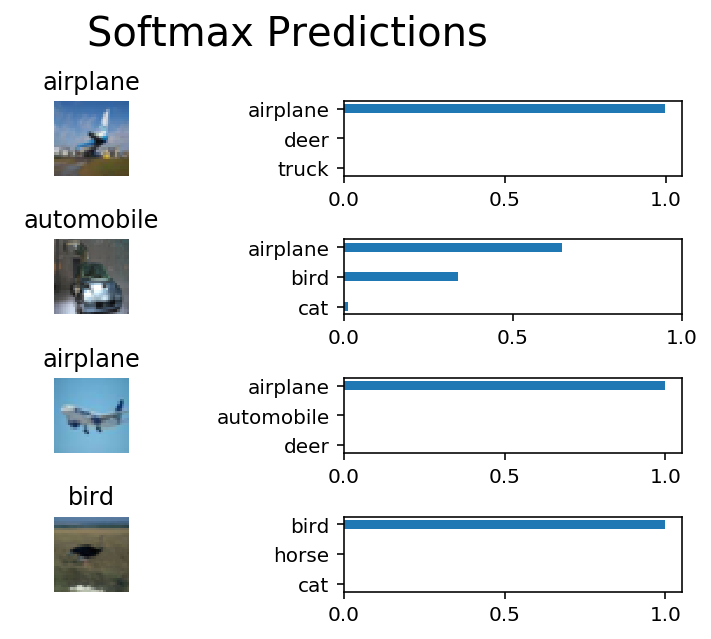

In [22]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import tensorflow as tf
import pickle
import helper
import random

# Set batch size if not already set
try:
    if batch_size:
        pass
except NameError:
    batch_size = 64

save_model_path = './image_classification'
n_samples = 4
top_n_predictions = 3

def test_model():
    """
    Test the saved model against the test dataset
    """

    test_features, test_labels = pickle.load(open('preprocess_training.p', mode='rb'))
    loaded_graph = tf.Graph()

    with tf.Session(graph=loaded_graph) as sess:
        # Load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('x:0')
        loaded_y = loaded_graph.get_tensor_by_name('y:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
        
        # Get accuracy in batches for memory limitations
        test_batch_acc_total = 0
        test_batch_count = 0
        
        for train_feature_batch, train_label_batch in helper.batch_features_labels(test_features, test_labels, batch_size):
            test_batch_acc_total += sess.run(
                loaded_acc,
                feed_dict={loaded_x: train_feature_batch, loaded_y: train_label_batch, loaded_keep_prob: 1.0})
            test_batch_count += 1

        print('Testing Accuracy: {}\n'.format(test_batch_acc_total/test_batch_count))

        # Print Random Samples
        random_test_features, random_test_labels = tuple(zip(*random.sample(list(zip(test_features, test_labels)), n_samples)))
        random_test_predictions = sess.run(
            tf.nn.top_k(tf.nn.softmax(loaded_logits), top_n_predictions),
            feed_dict={loaded_x: random_test_features, loaded_y: random_test_labels, loaded_keep_prob: 1.0})
        helper.display_image_predictions(random_test_features, random_test_labels, random_test_predictions)


test_model()

## Why 50-80% Accuracy?
You might be wondering why you can't get an accuracy any higher. First things first, 50% isn't bad for a simple CNN.  Pure guessing would get you 10% accuracy. That's because there are many more techniques that can be applied to your model and we recemmond that once you are done with this project, you explore!

## Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook.  Save the notebook file as "image_classification.ipynb" and save it as a HTML file under "File" -> "Download as".  Include the "helper.py" and "problem_unittests.py" files in your submission.